#Project 3: Predicting Smoker Status

Eve Dean

##Notebook Outline:
The purpose of this notebook is to explore and visualize data related to smoker status and health conditions and plot data to explain the relationships between variables. The main research question for this project is which health factors have the strongest relationship with smoking?//Can we predict smoker status based on health body signals? We will eventually use this infomation to build a model to predict smoker status based on health outcomes.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading & Visualizing Data

##Loading

In [ ]:
drive_dir = '/content/drive/MyDrive/Colab Notebooks/Project 3/data/'

In [ ]:
df = pd.read_csv(drive_dir + 'cleaned_data.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957


In [ ]:
# gender: 0 = female, 1 = male

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'urine protein',
       'serum creatinine', 'AST', 'ALT', 'ggt', 'dental caries', 'tartar',
       'smoking', 'bmi', 'upcratio', 'LDLratio', 'HDLratio'],
      dtype='object')

In [ ]:
df.shape

(55692, 30)

##Checking Correlation 

###Correlation

In [ ]:
corr1_df = df.corr()

In [ ]:
r2_df = df.corr()**2
r2_df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
ID,1.000000e+00,0.000075,6.798946e-07,0.000040,0.000023,0.000029,0.000092,0.000010,0.000007,2.458877e-05,...,3.477922e-06,0.000008,6.771221e-07,4.102752e-07,0.000006,0.000132,0.000004,0.000023,0.000007,1.643165e-05
gender,7.493796e-05,1.000000,8.415538e-02,0.549905,0.330575,0.176037,0.016237,0.015796,0.000088,1.340648e-04,...,9.161974e-03,0.028192,5.629723e-02,7.124694e-03,0.003077,0.260447,0.045726,0.075106,0.000002,4.382019e-02
age,6.798946e-07,0.084155,1.000000e+00,0.229947,0.105434,0.000692,0.038209,0.037142,0.041613,4.356500e-02,...,1.061185e-03,0.004088,1.698167e-04,1.322134e-02,0.006691,0.026425,0.004018,0.008522,0.000147,9.424005e-04
height(cm),3.976979e-05,0.549905,2.299475e-01,1.000000,0.456511,0.143567,0.022841,0.024232,0.006188,6.134420e-03,...,1.742009e-03,0.016005,1.952178e-02,6.293420e-03,0.003082,0.157351,0.019665,0.045956,0.000027,1.761608e-02
weight(kg),2.317066e-05,0.330575,1.054338e-01,0.456511,1.000000,0.677069,0.011758,0.012804,0.002509,2.791648e-03,...,1.443126e-02,0.062818,4.394248e-02,5.407582e-03,0.003591,0.091676,0.672243,0.024639,0.001495,1.080460e-01
waist(cm),2.898557e-05,0.176037,6.915311e-04,0.143567,0.677069,1.000000,0.000754,0.001444,0.000566,3.719450e-04,...,2.036032e-02,0.063745,5.911768e-02,1.953893e-03,0.002134,0.051193,0.671131,0.008902,0.002690,1.346694e-01
eyesight(left),9.245979e-05,0.016237,3.820949e-02,0.022841,0.011758,0.000754,1.000000,0.125723,0.002169,2.380221e-03,...,6.345546e-05,0.000373,1.481990e-05,1.357506e-05,0.000157,0.003746,0.000872,0.001383,0.000028,1.185925e-04
eyesight(right),9.538043e-06,0.015796,3.714205e-02,0.024232,0.012804,0.001444,0.125723,1.000000,0.001925,2.173678e-03,...,4.789700e-05,0.000585,1.487063e-04,2.676136e-04,0.000043,0.003971,0.001011,0.001525,0.000002,2.342192e-04
hearing(left),7.163502e-06,0.000088,4.161315e-02,0.006188,0.002509,0.000566,0.002169,0.001925,1.000000,2.601972e-01,...,3.266725e-04,0.000023,1.654907e-04,2.592210e-04,0.001253,0.000539,0.000025,0.000107,0.000084,5.321029e-06
hearing(right),2.458877e-05,0.000134,4.356500e-02,0.006134,0.002792,0.000372,0.002380,0.002174,0.260197,1.000000e+00,...,8.823579e-05,0.000026,8.547156e-05,2.681652e-04,0.000713,0.000356,0.000102,0.000113,0.000055,2.597580e-07


In [ ]:
#Test corr
smoking_corr = []
smoking_r2 = []
vari = []
for col in df.columns:
  corr = df['smoking'].corr(df[col])
  smoking_corr.append(corr)
  
  r2 = df['smoking'].corr(df[col])**2  
  smoking_r2.append(r2)
  vari.append(col)

smoking_corr_df = pd.DataFrame ({'variable':vari,'Correlation':smoking_corr,'R2':smoking_r2})
sort_corr = smoking_corr_df.sort_values('Correlation' , ascending = False)
sort_r2 = smoking_corr_df.sort_values('R2' , ascending = False)

In [ ]:
sort_corr

,variable,Correlation,R2
25,smoking,1.000000,1.000000
1,gender,0.510340,0.260447
17,hemoglobin,0.400678,0.160543
3,height(cm),0.396675,0.157351
4,weight(kg),0.302780,0.091676
14,triglyceride,0.251799,0.063403
22,ggt,0.236619,0.055989
5,waist(cm),0.226259,0.051193
19,serum creatinine,0.216812,0.047008
11,relaxation,0.108309,0.011731


In [ ]:
sort_r2

,variable,Correlation,R2
25,smoking,1.000000,1.000000
1,gender,0.510340,0.260447
17,hemoglobin,0.400678,0.160543
3,height(cm),0.396675,0.157351
4,weight(kg),0.302780,0.091676
14,triglyceride,0.251799,0.063403
22,ggt,0.236619,0.055989
5,waist(cm),0.226259,0.051193
19,serum creatinine,0.216812,0.047008
15,HDL,-0.178470,0.031852


###R2

In [ ]:
#test R2
smoking_r2 = []
vari2 = []
for col in df.columns:
  r2 = df['smoking'].corr(df[col])**2
  # print(f'smoking x {col}:{corr}')
  smoking_r2.append(r2)
  vari2.append(col)


smoking_r2_df = pd.DataFrame ({'variable':vari2,'R2':smoking_r2})
smoking_r2_df

,variable,R2
0,ID,0.000132
1,gender,0.260447
2,age,0.026425
3,height(cm),0.157351
4,weight(kg),0.091676
5,waist(cm),0.051193
6,eyesight(left),0.003746
7,eyesight(right),0.003971
8,hearing(left),0.000539
9,hearing(right),0.000356


In [ ]:
#find variables with highest correlation
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

LDL             LDLratio            0.860556
weight(kg)      waist(cm)           0.822842
                bmi                 0.819904
waist(cm)       bmi                 0.819226
systolic        relaxation          0.761051
                                      ...   
hearing(right)  HDLratio            0.000510
LDL             AST                 0.000388
ID              urine protein       0.000382
hearing(right)  triglyceride        0.000267
cholesterol     serum creatinine    0.000129
Length: 435, dtype: float64

##Making new df grouped by smoking status

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'urine protein',
       'serum creatinine', 'AST', 'ALT', 'ggt', 'dental caries', 'tartar',
       'smoking', 'bmi', 'upcratio', 'LDLratio', 'HDLratio'],
      dtype='object')

In [ ]:
smokers_df = df.groupby(df['smoking']).agg({"age": np.mean,
                                            'height(cm)': np.mean,
                                            'weight(kg)': np.mean,
                                            'waist(cm)':np.mean,
                                            'eyesight(left)': np.mean,
                                            'eyesight(right)':np.mean,
                                            'hearing(left)': np.mean,
                                            'hearing(right)': np.mean,
                                            'systolic': np.mean,
                                            'relaxation': np.mean,
                                            'fasting blood sugar': np.mean,
                                            'cholesterol': np.mean,
                                            'triglyceride': np.mean,
                                            'HDL': np.mean,
                                            'LDL': np.mean,
                                            'hemoglobin': np.mean,
                                            'urine protein': np.mean,
                                            'serum creatinine': np.mean,
                                            'AST': np.mean,
                                            'ALT': np.mean,
                                            'ggt': np.mean,
                                            'dental caries': np.mean,
                                            'tartar': np.mean,
                                            'bmi': np.mean, 
                                            'upcratio' : np.mean, 
                                            'LDLratio' : np.mean, 
                                            'HDLratio' : np.mean})
smokers_df.reset_index(inplace=True)

smokers_df.head()

,smoking,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,ggt,dental caries,tartar,bmi,upcratio,LDLratio,HDLratio
0,0,45.677981,161.870477,62.907455,80.447669,0.989920,0.984110,1.028379,1.028436,120.732440,...,0.849144,25.309135,24.740897,30.885859,0.180918,0.518205,0.002388,1.349318,0.580442,0.307190
1,1,41.607431,169.436324,70.959668,84.800518,1.051733,1.047636,1.020777,1.022195,122.806502,...,0.948775,27.688194,30.989782,55.570423,0.269176,0.619897,0.002465,1.196320,0.566215,0.283629


In [ ]:
smoke_df = df[df['smoking']==1]
smoke_df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
6,6,1,40,160,60,85.5,1.0,1.0,1,1,...,21,27,39,1,1,1,0.002344,1.428571,0.694690,0.243363
12,13,1,35,170,70,81.0,1.5,1.0,1,1,...,21,27,83,0,0,1,0.002422,1.111111,0.432584,0.331461
17,19,1,35,165,70,87.5,1.0,0.8,1,1,...,37,43,30,0,1,1,0.002571,1.111111,0.537445,0.180617
18,21,1,60,165,65,79.0,1.0,1.0,1,1,...,23,19,36,0,0,1,0.002388,1.111111,0.333333,0.480620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55673,55596,1,75,155,45,68.0,0.6,0.7,1,1,...,46,43,110,0,1,1,0.001873,0.909091,0.366667,0.266667
55675,55607,1,30,170,70,88.8,1.0,0.9,1,1,...,17,16,15,0,1,1,0.002422,1.111111,0.567251,0.368421
55679,55632,1,45,180,90,92.0,1.2,1.5,1,1,...,13,18,29,0,0,1,0.002778,0.833333,0.673684,0.235088
55684,55666,1,40,170,65,85.0,1.2,1.2,1,1,...,22,25,33,0,1,1,0.002249,0.909091,0.604167,0.229167


In [ ]:
non_smoke_df = df[df['smoking']==0]
non_smoke_df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957
5,5,1,30,180,75,85.0,1.2,1.2,1,1,...,18,27,33,0,1,0,0.002315,0.833333,0.594470,0.221198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,55673,0,60,150,50,75.0,1.0,1.2,1,1,...,26,21,14,0,1,0,0.002222,1.250000,0.648045,0.290503
55687,55676,0,40,170,65,75.0,0.9,0.9,1,1,...,14,7,10,1,1,0,0.002249,1.666667,0.553991,0.352113
55688,55681,0,45,160,50,70.0,1.2,1.2,1,1,...,20,12,14,0,1,0,0.001953,1.111111,0.475904,0.439759
55689,55683,0,55,160,50,68.5,1.0,1.2,1,1,...,17,11,12,0,0,0,0.001953,2.000000,0.398734,0.500000


#Plotting
- make plots for data exploration 
- scatterplots for highly correlated variables 

###Graph Aesthetics

In [ ]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 40

# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

##Histograms

In [ ]:
def make_hist(df, x):
  plt.figure(figsize = (10,10))
  plt.hist(df[x])
  plt.title(f'{x} histogram')
  plt.xlabel(x)

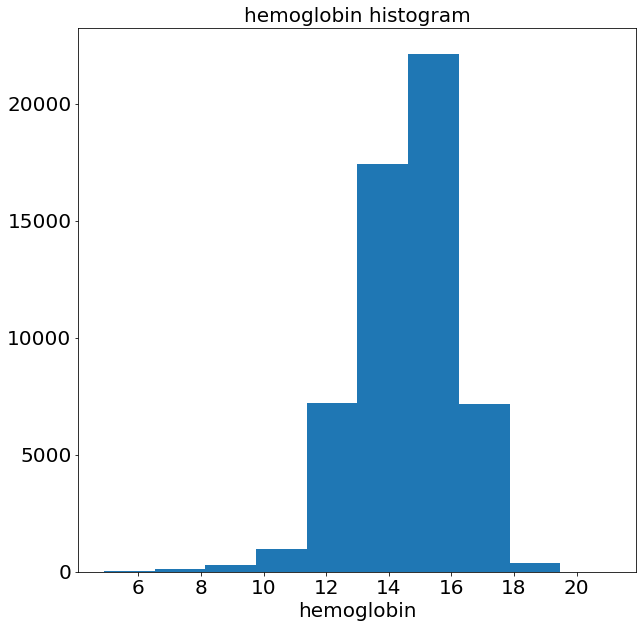

In [ ]:
make_hist(df, 'hemoglobin')

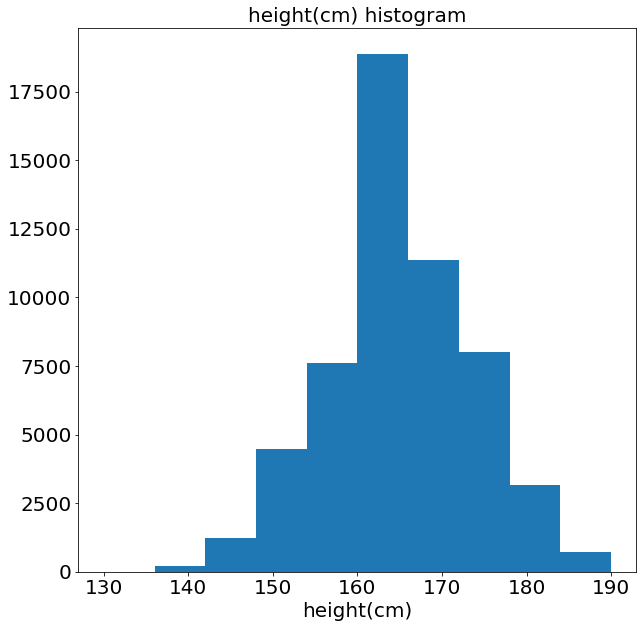

In [ ]:
make_hist(df, 'height(cm)')

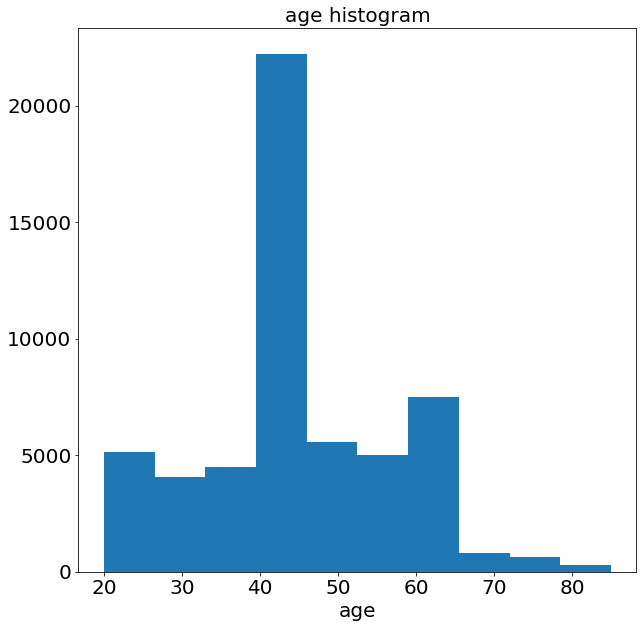

In [ ]:
make_hist(df, 'age')

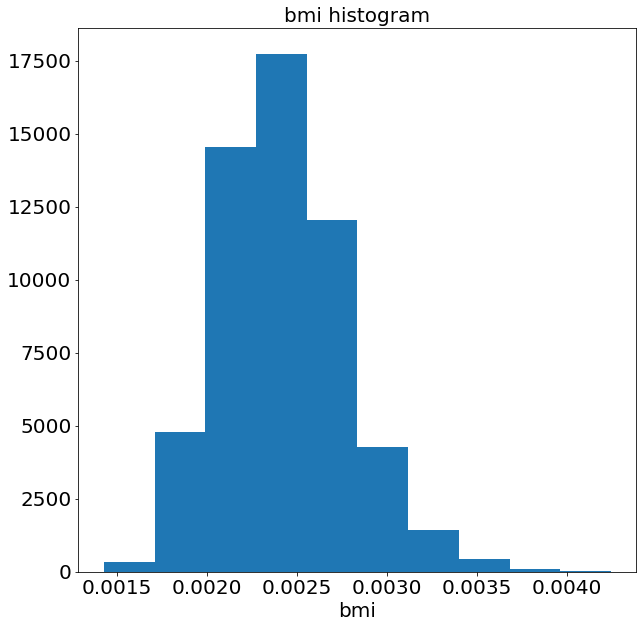

In [ ]:
make_hist(df,'bmi')

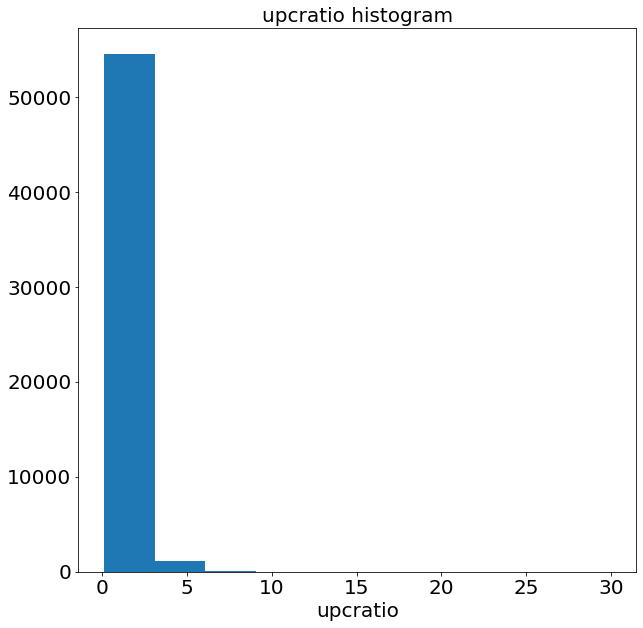

In [ ]:
make_hist(df,'upcratio')

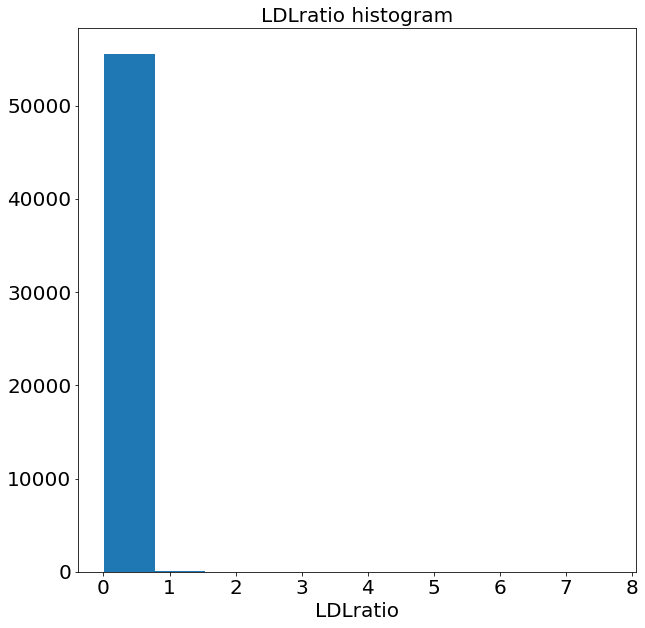

In [ ]:
make_hist(df,'LDLratio')

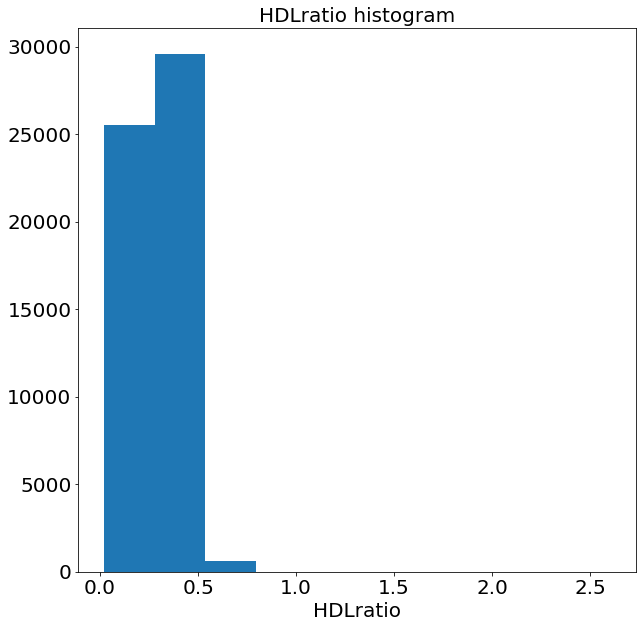

In [ ]:
make_hist(df,'HDLratio')

####For Loop
Make for loop to make histograms for each column/variable 

<ipython-input-19-7fc2fc599bab>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10,10))


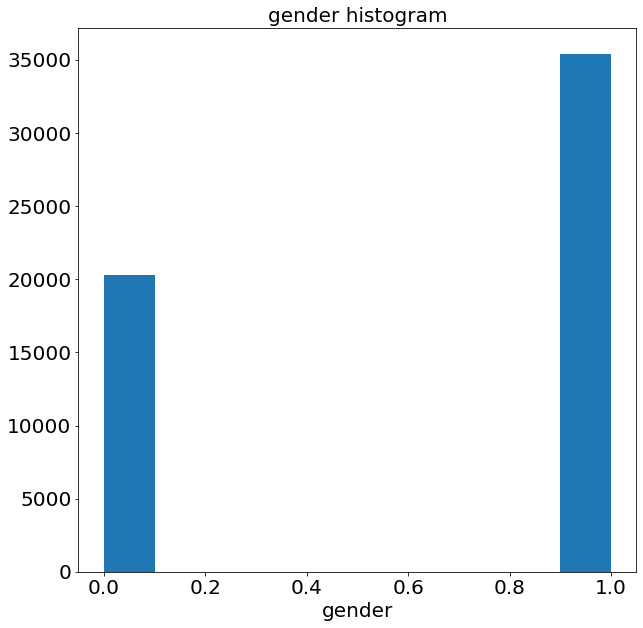

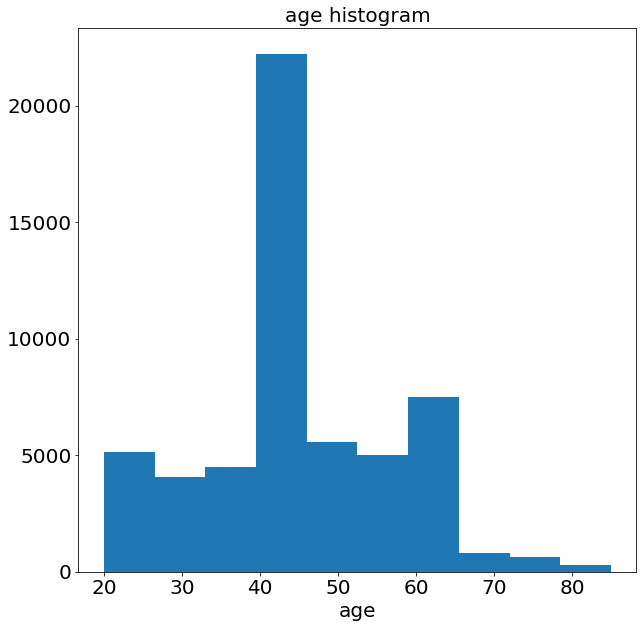

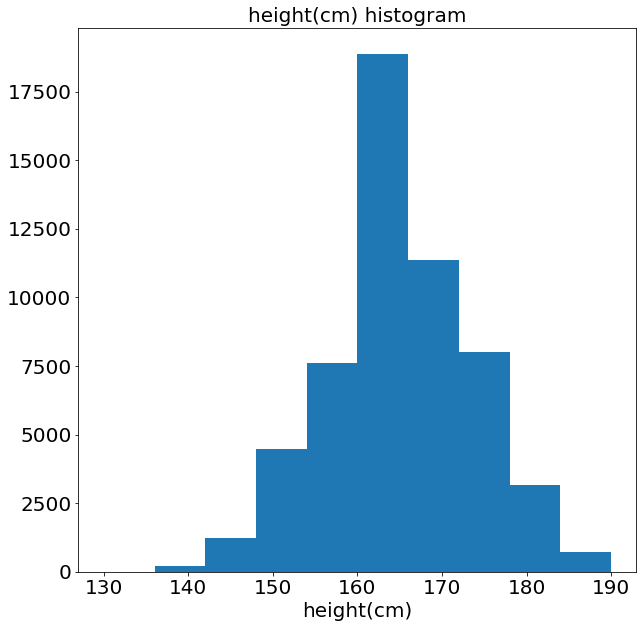

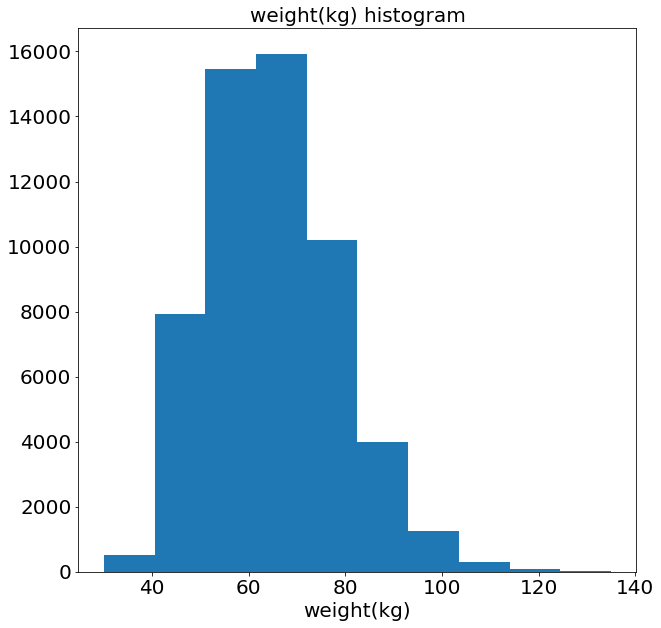

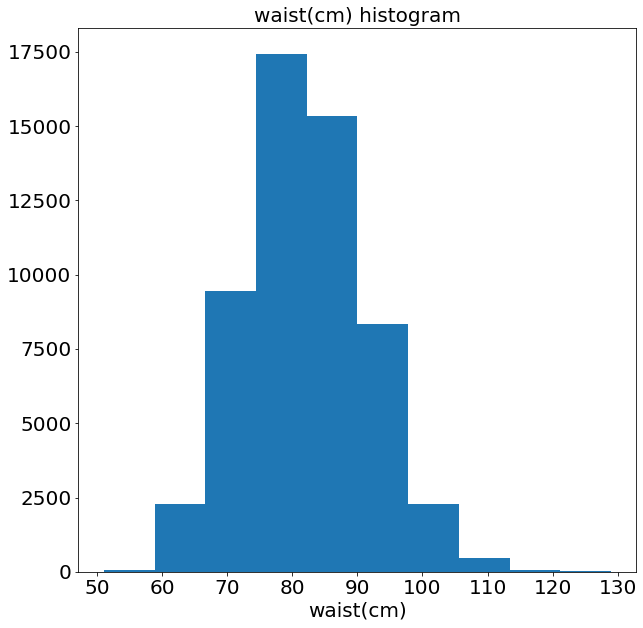

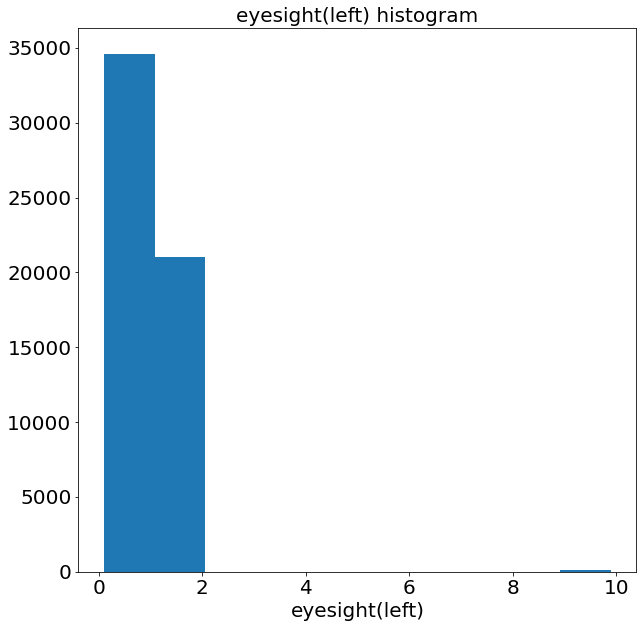

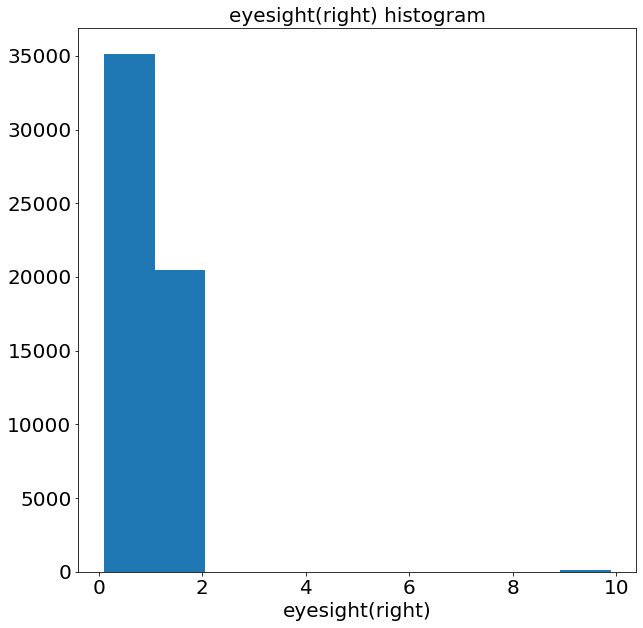

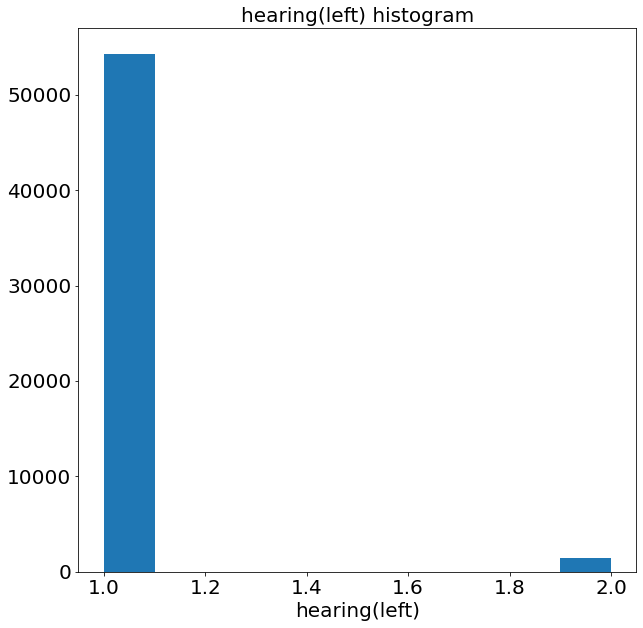

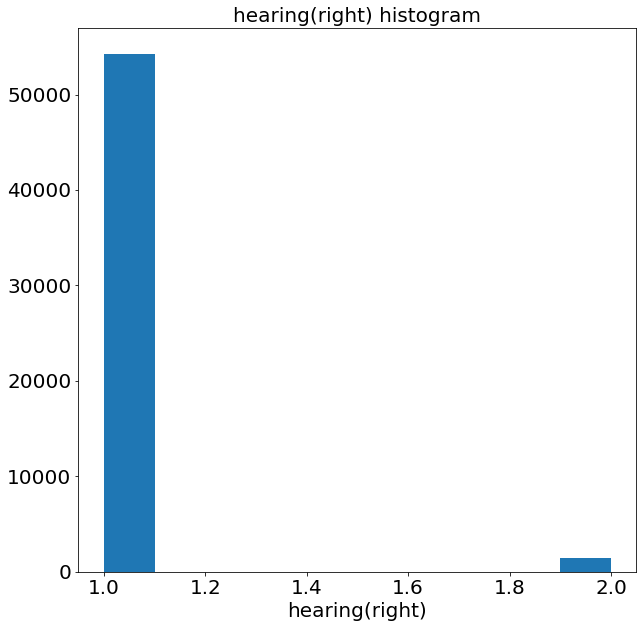

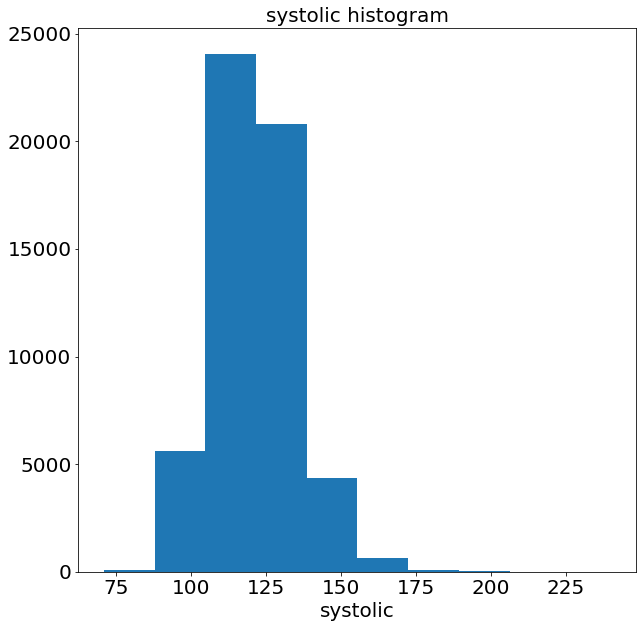

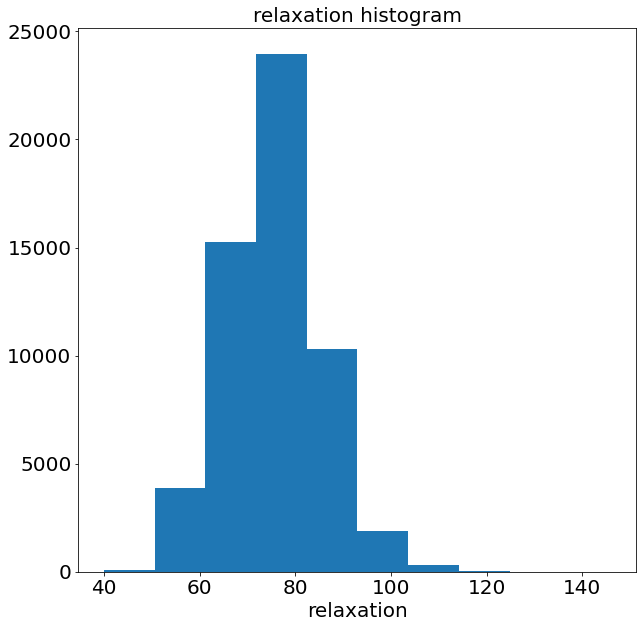

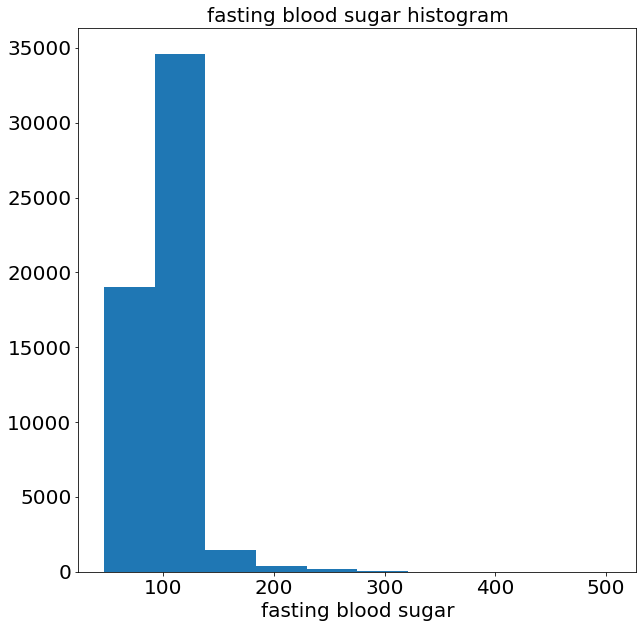

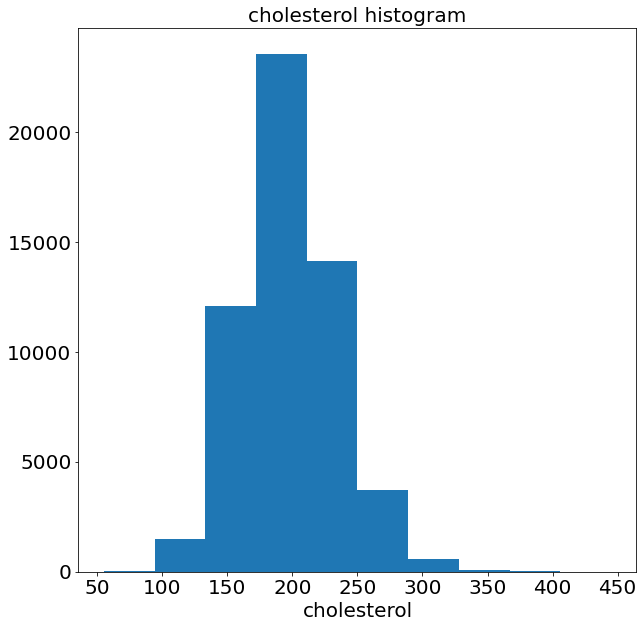

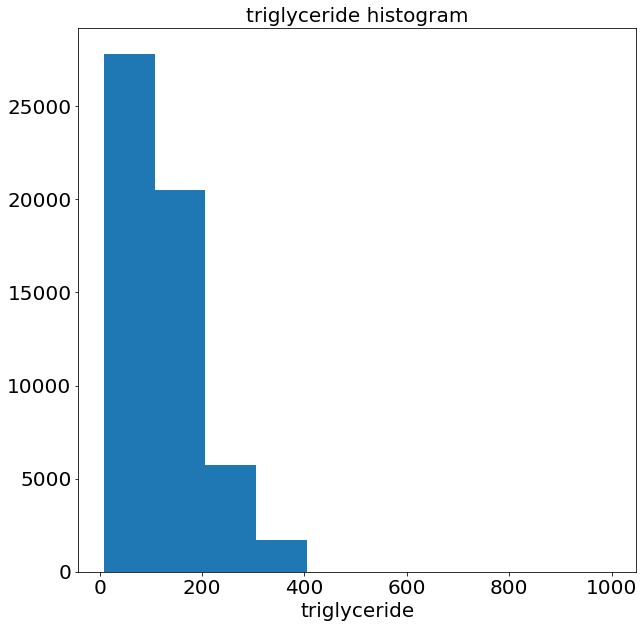

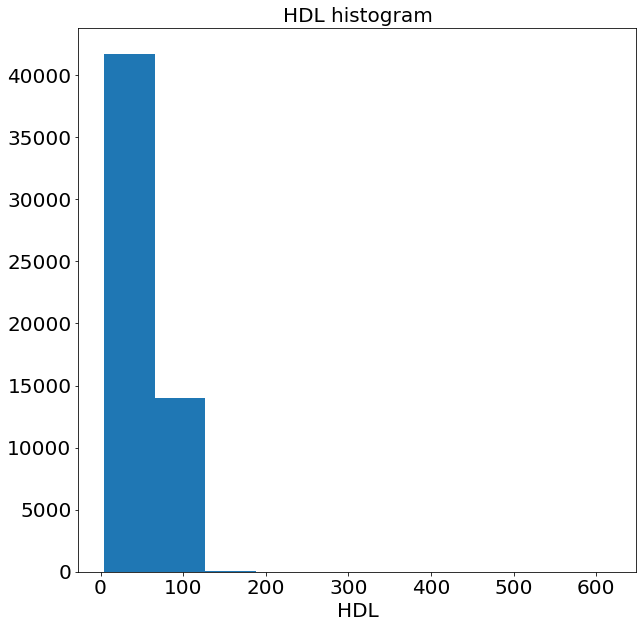

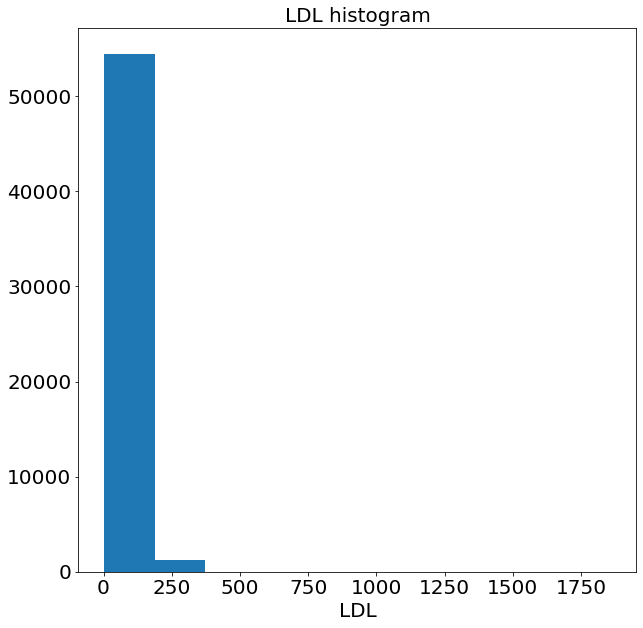

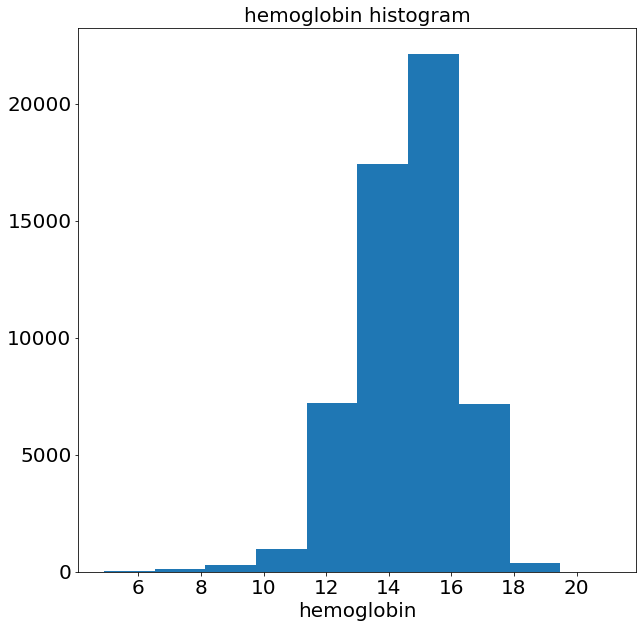

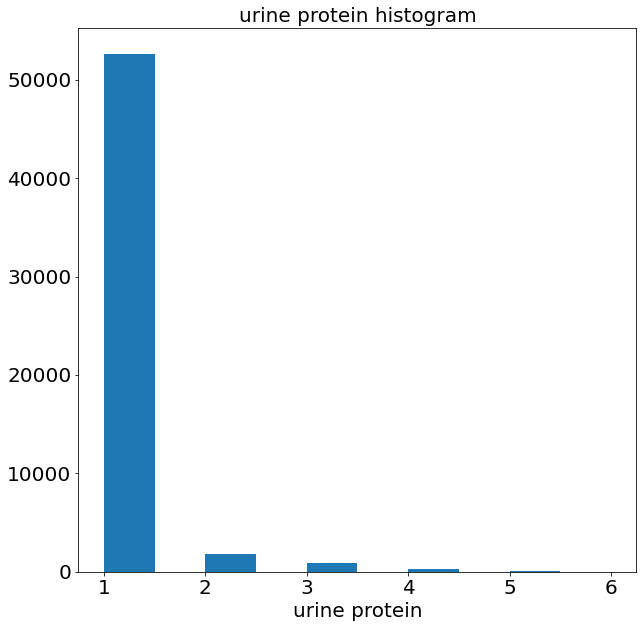

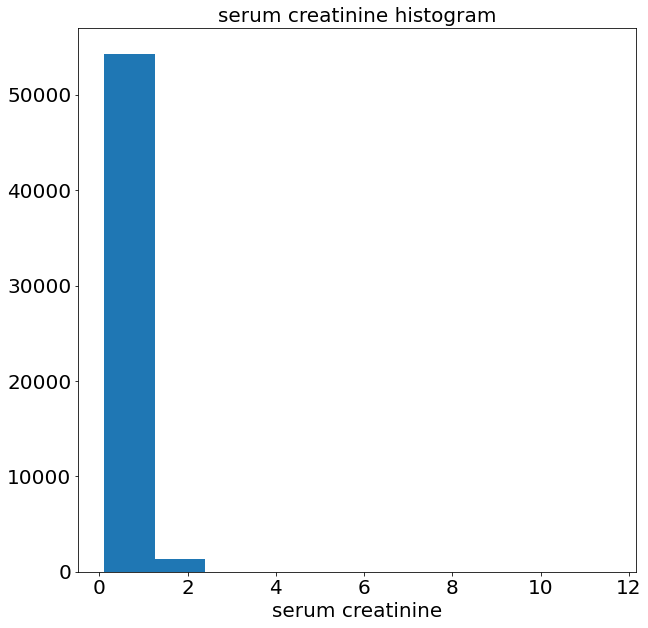

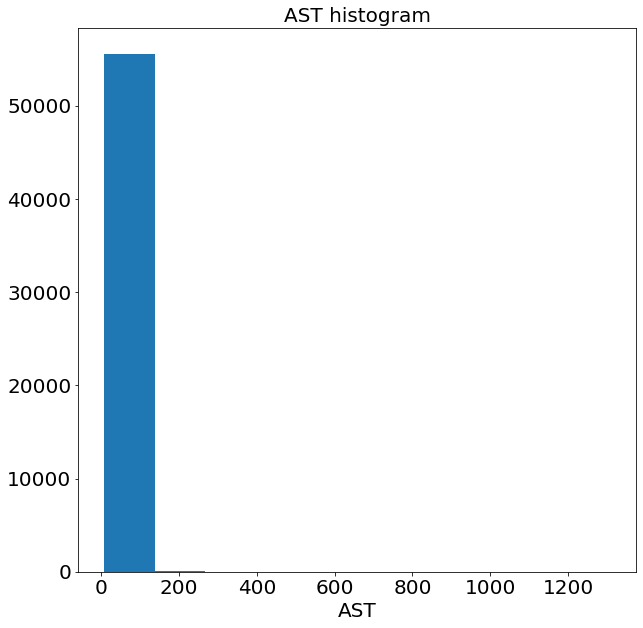

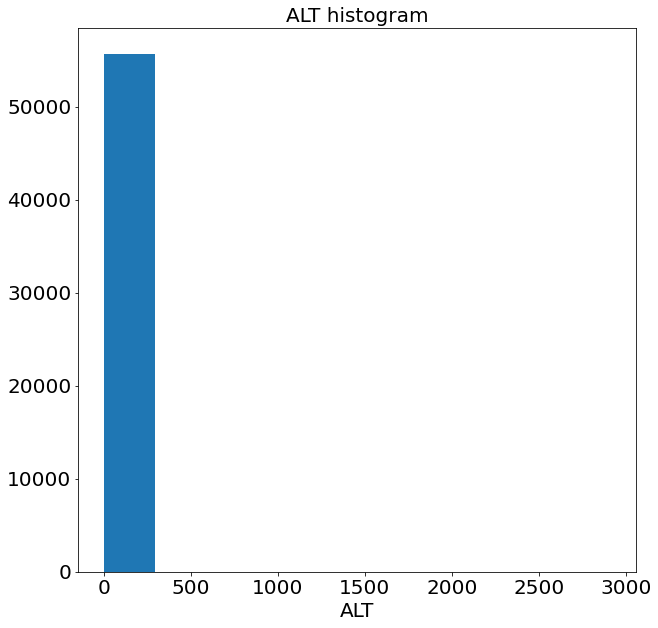

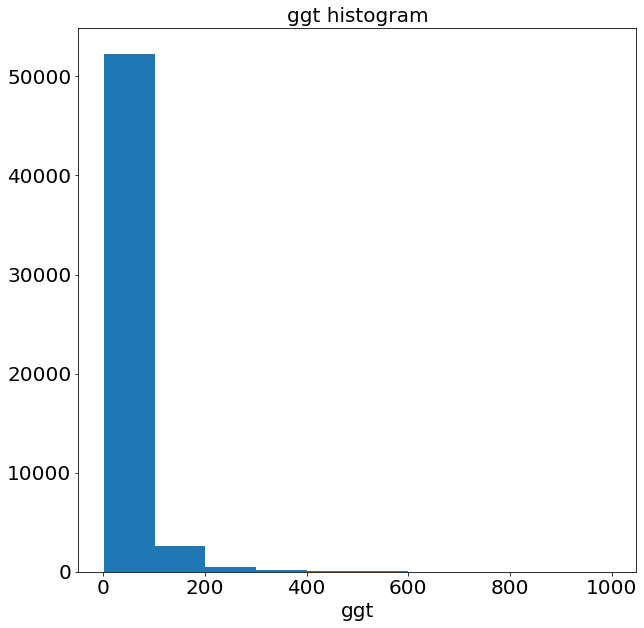

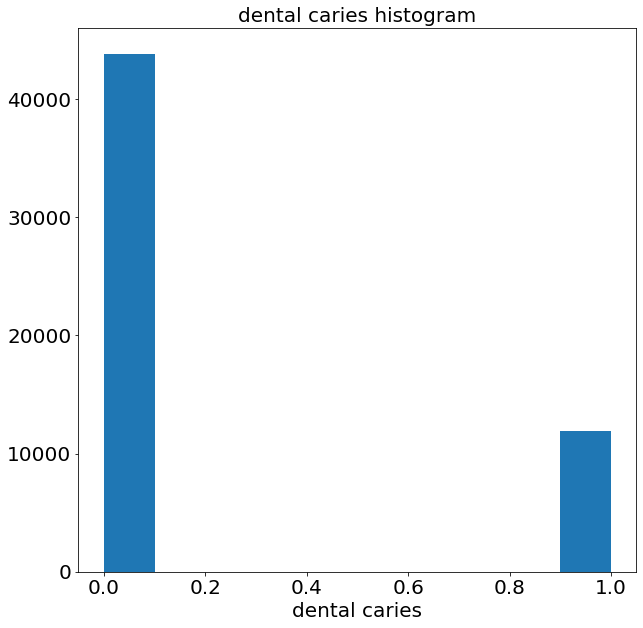

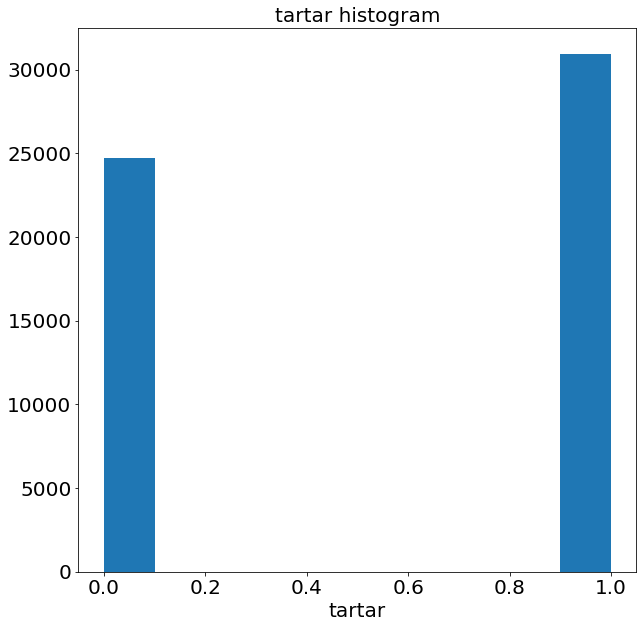

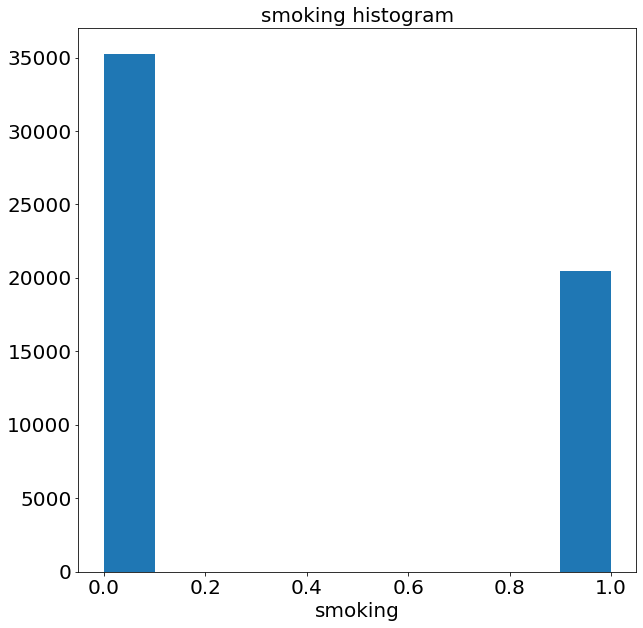

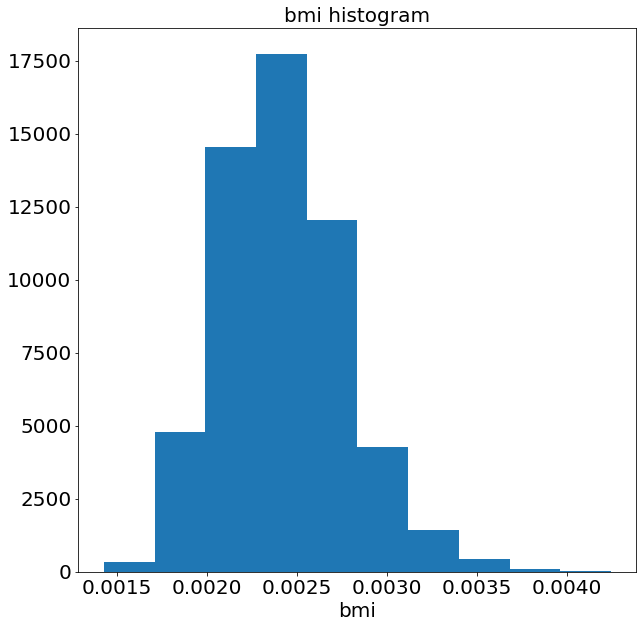

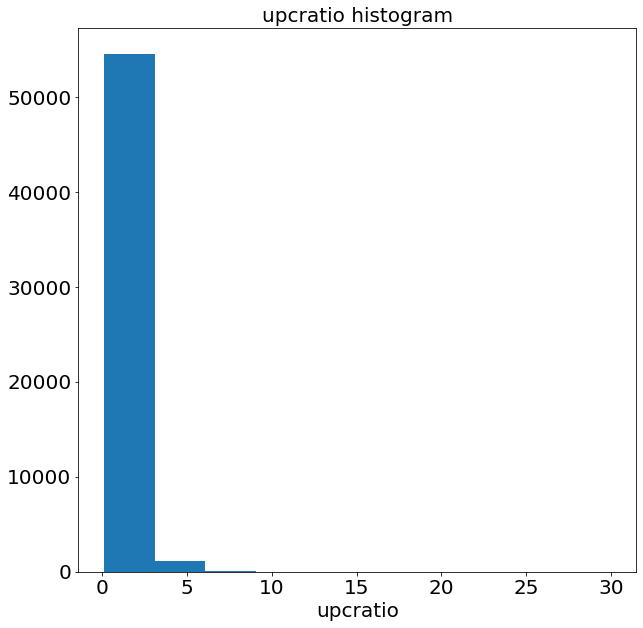

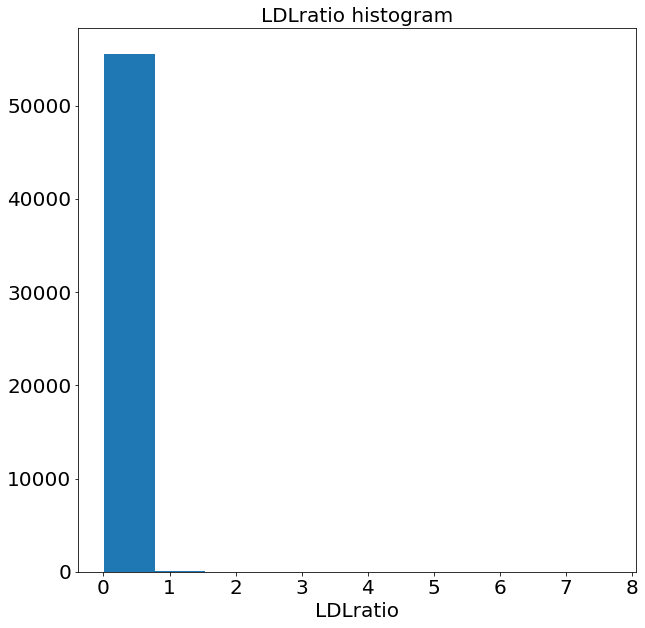

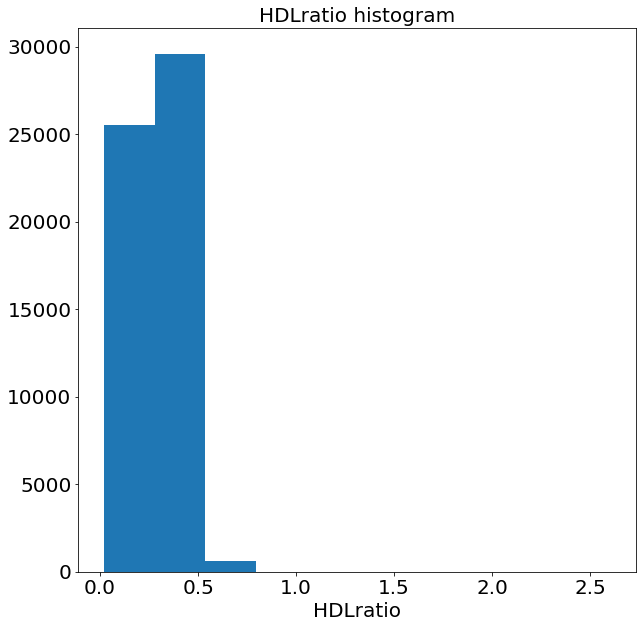

In [ ]:
for col in df.columns[1:]:
  make_hist(df, col)

##Layered Histograms

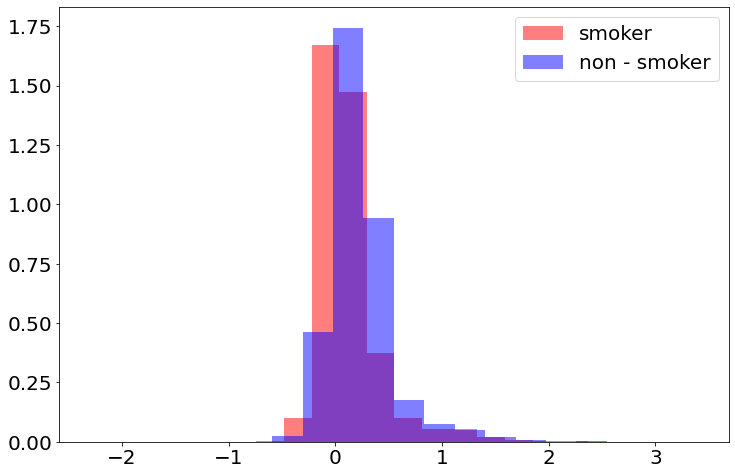

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(np.log(smoke_df['upcratio']),label = 'smoker', color = 'red', alpha = 0.5, density = True, bins = 20)
plt.hist(np.log(non_smoke_df['upcratio']),label = 'non - smoker', color = 'blue', alpha = 0.5, density = True, bins = 20)
plt.legend()


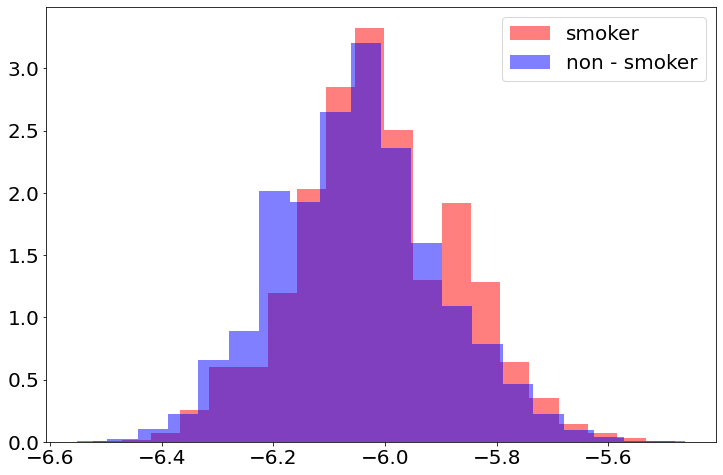

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(np.log(smoke_df['bmi']),label = 'smoker', color = 'red', alpha = 0.5, density = True, bins = 20)
plt.hist(np.log(non_smoke_df['bmi']),label = 'non - smoker', color = 'blue', alpha = 0.5, density = True, bins = 20)
plt.legend()

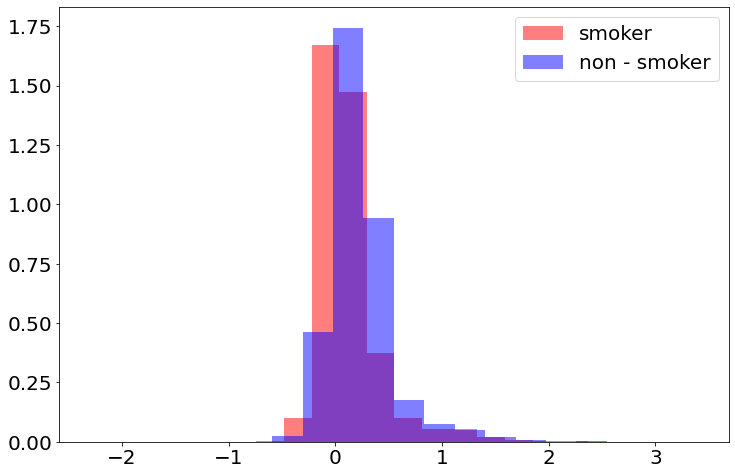

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(np.log(smoke_df['upcratio']),label = 'smoker', color = 'red', alpha = 0.5, density = True, bins = 20)
plt.hist(np.log(non_smoke_df['upcratio']),label = 'non - smoker', color = 'blue', alpha = 0.5, density = True, bins = 20)
plt.legend()

##Bar charts

In [ ]:
smoke_df = df.groupby(df['smoking']).agg({"ID": "count"})
smoke_df['smoke%'] = smoke_df['ID']/len(df)
smoke_df.reset_index(inplace=True)
smoke_df

,smoking,ID,smoke%
0,0,35237,0.632712
1,1,20455,0.367288


<Axes: title={'center': 'Smoker breakdown'}, xlabel='smokers', ylabel='percent %'>

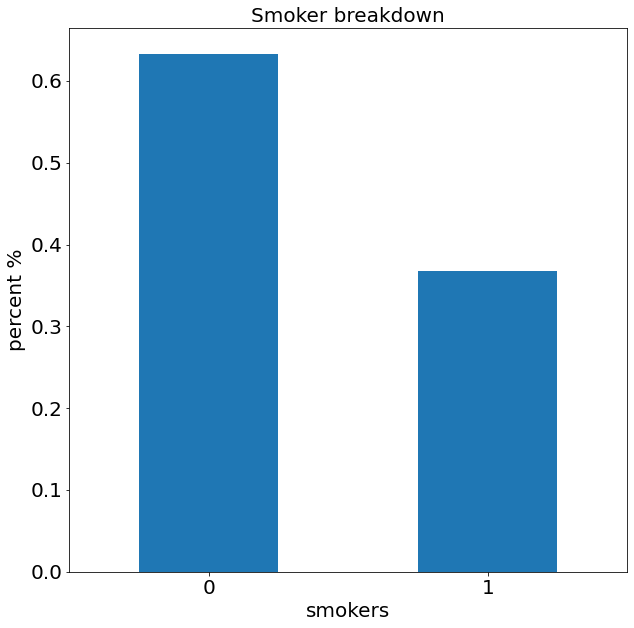

In [ ]:
smoke_df.plot(kind = 'bar',
              x = 'smoking',
              y = 'smoke%',
              xlabel = 'smokers',
              ylabel = 'percent %', 
              legend = False,
            figsize = (10,10),
            rot = 0, 
            title = 'Smoker breakdown')
#smoking = 1, non-smoking = 0

<Axes: title={'center': 'Gender breakdown'}, xlabel='gender', ylabel='percent %'>

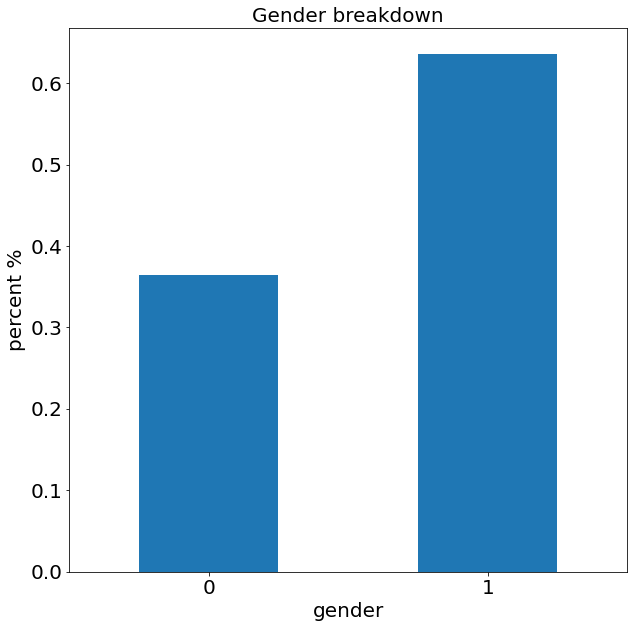

In [ ]:
gen_df = df.groupby(df['gender']).agg({"ID": "count"})
gen_df['gen%'] = gen_df['ID']/len(df)
gen_df.reset_index(inplace=True)
# gen_df.head()
gen_df.plot(kind = 'bar',
              x = 'gender',
              y = 'gen%',
              xlabel = 'gender',
              ylabel = 'percent %', 
              legend = False,
            figsize = (10,10),
            rot = 0,
            title = 'Gender breakdown')

In [ ]:
gen_df

,gender,ID,gen%
0,0,20291,0.364343
1,1,35401,0.635657


###For loop comparing smokers and non-smokers
for loop comparing variables for smokers and non smokers, function groups by smoking

In [ ]:
def make_bar(df,x):
  df.plot(kind = 'bar',
              x = 'smoking',
              y = x,
              xlabel = 'Smoking',
              ylabel = f'mean {x}', 
              legend = False,
              figsize = (10,10),
              rot = 0,
              title = f'Mean {x} for Smokers & Non-Smokers')

In [ ]:
smokers_df

,smoking,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,ggt,dental caries,tartar,bmi,upcratio,LDLratio,HDLratio
0,0,45.677981,161.870477,62.907455,80.447669,0.989920,0.984110,1.028379,1.028436,120.732440,...,0.849144,25.309135,24.740897,30.885859,0.180918,0.518205,0.002388,1.349318,0.580442,0.307190
1,1,41.607431,169.436324,70.959668,84.800518,1.051733,1.047636,1.020777,1.022195,122.806502,...,0.948775,27.688194,30.989782,55.570423,0.269176,0.619897,0.002465,1.196320,0.566215,0.283629


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


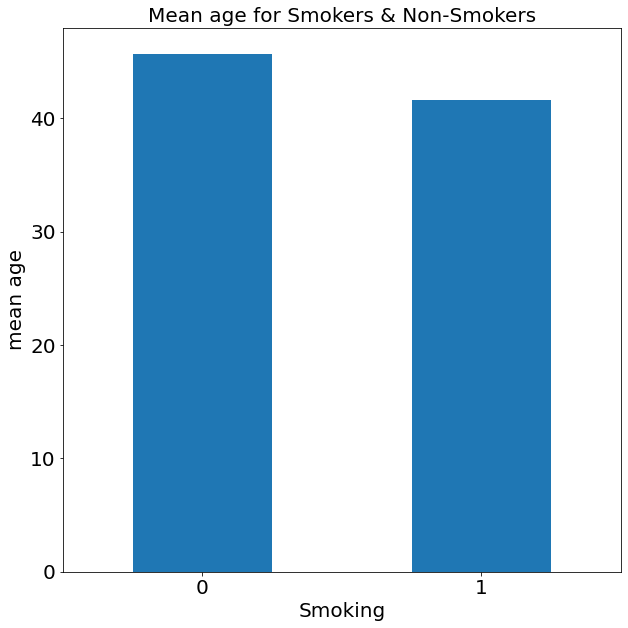

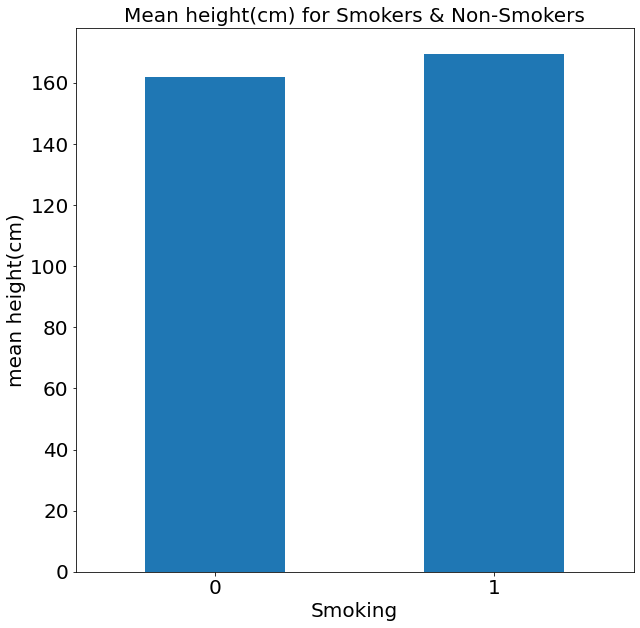

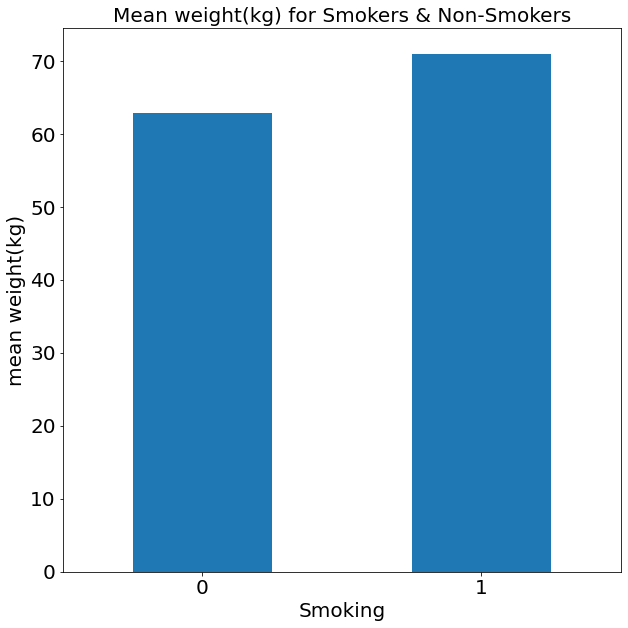

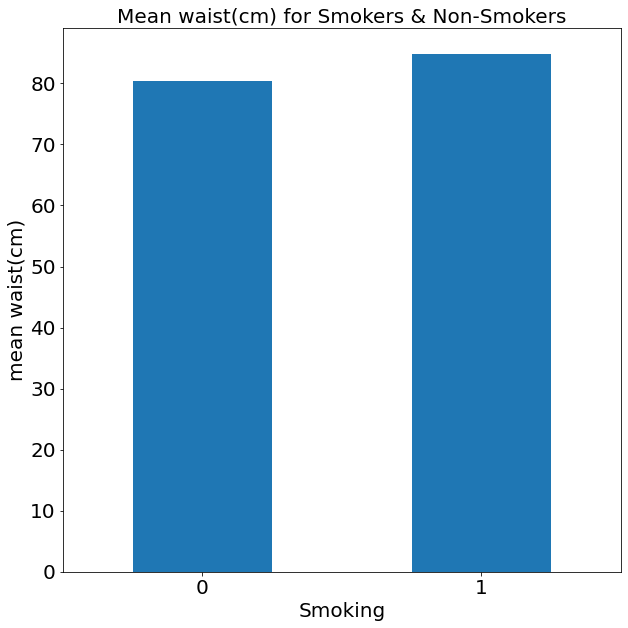

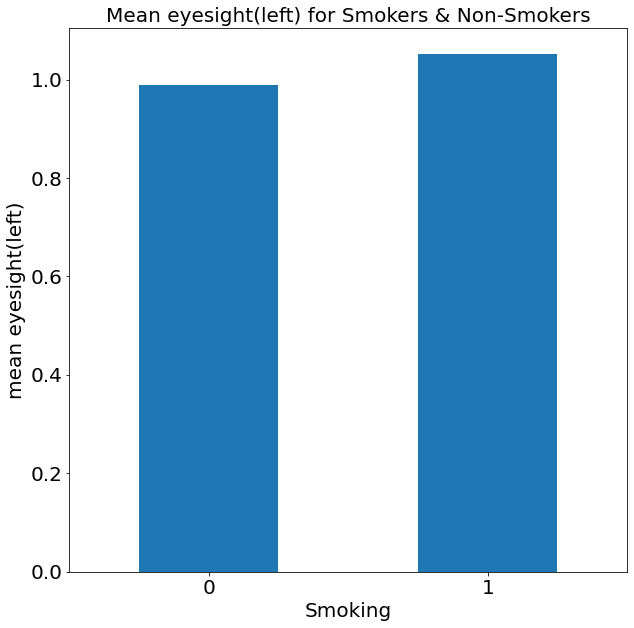

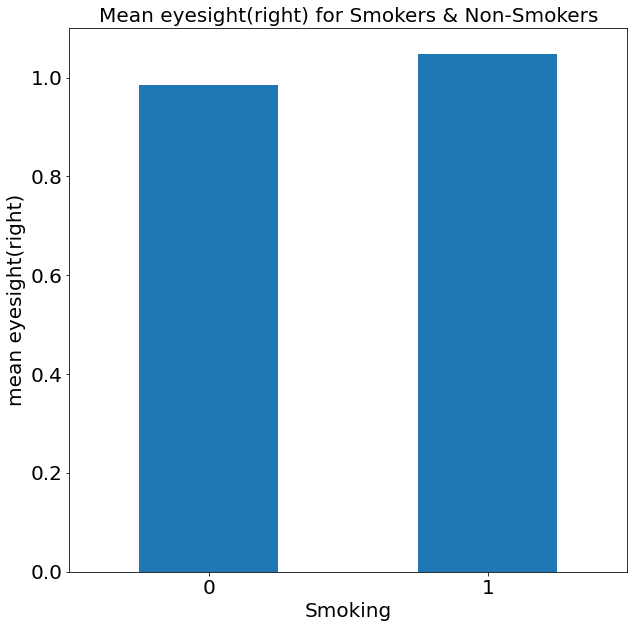

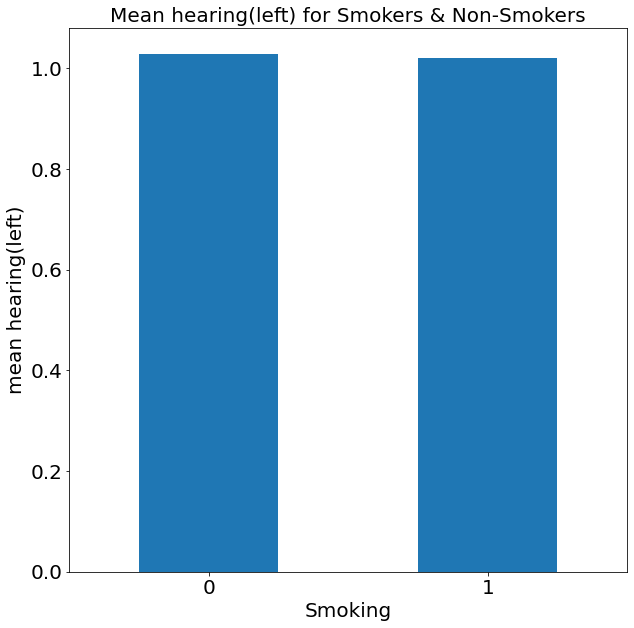

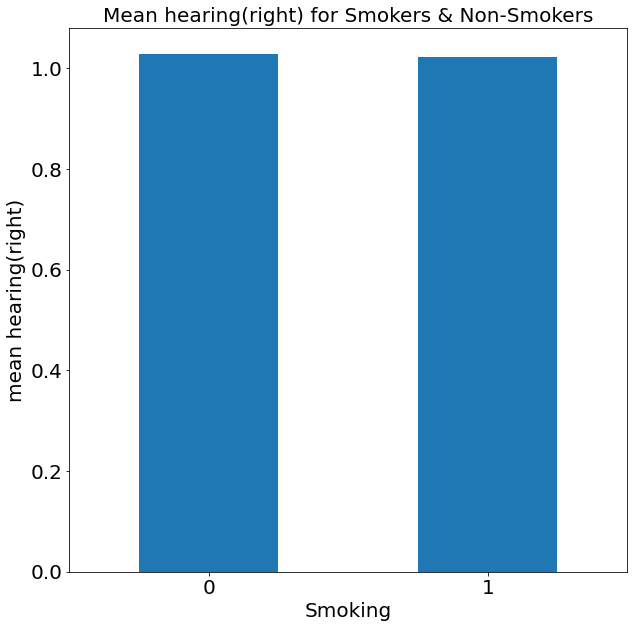

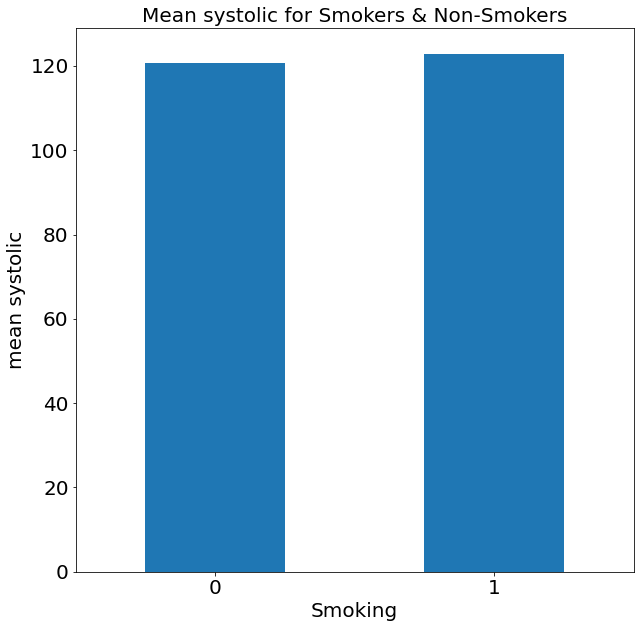

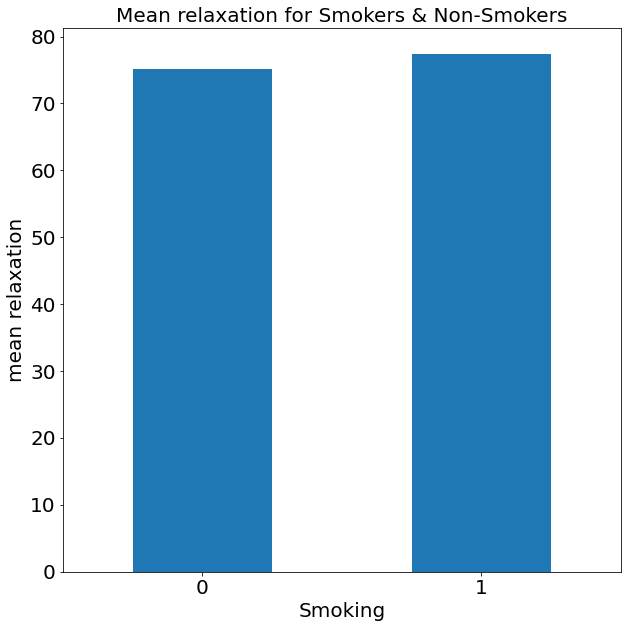

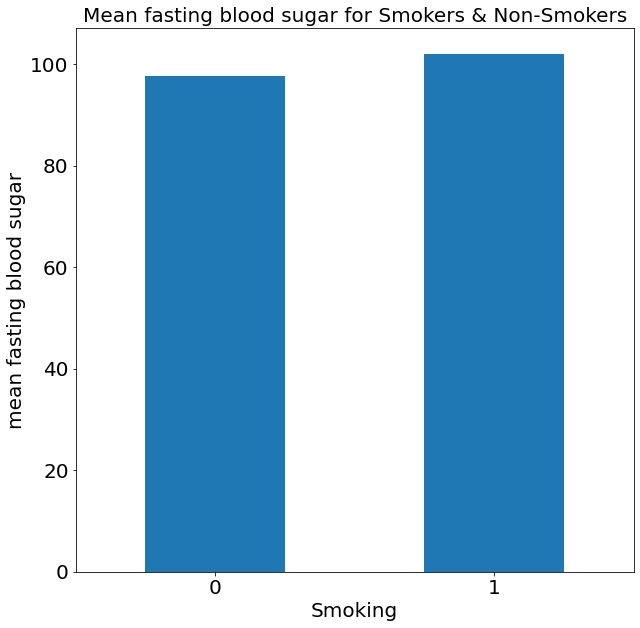

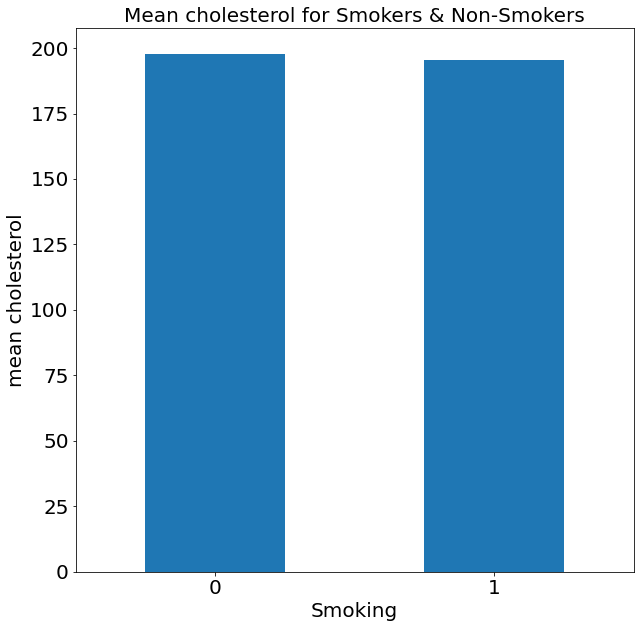

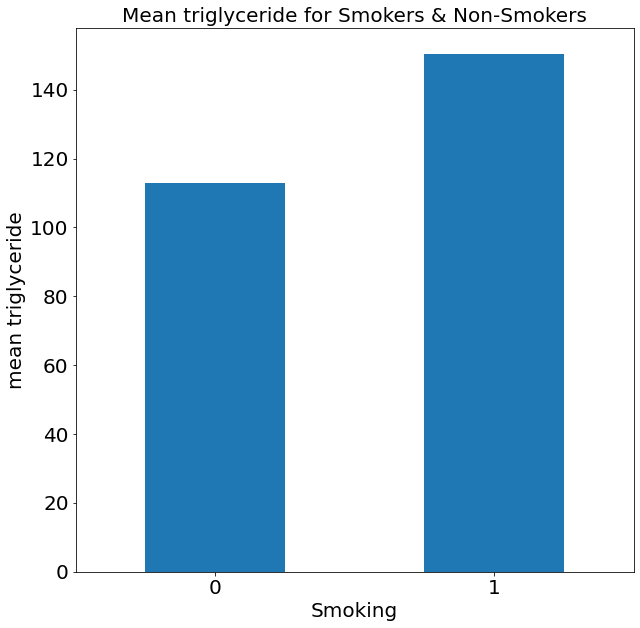

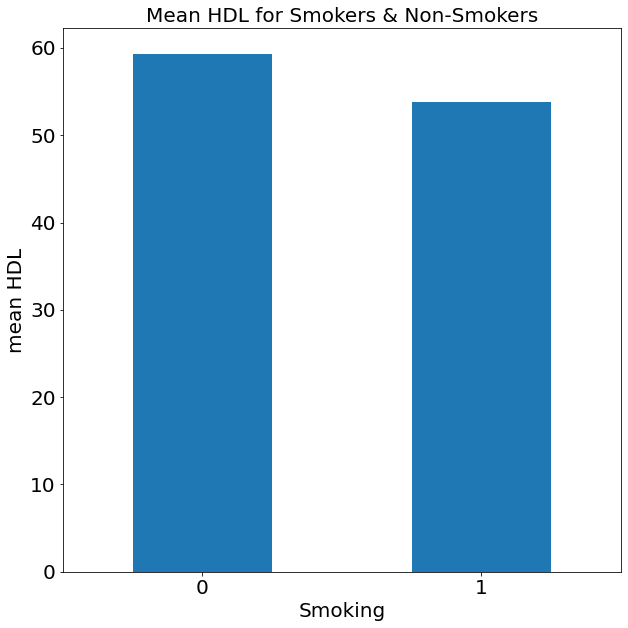

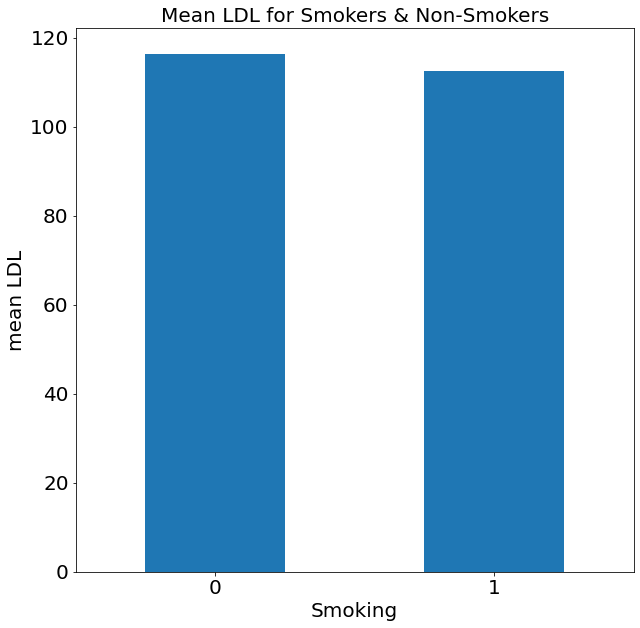

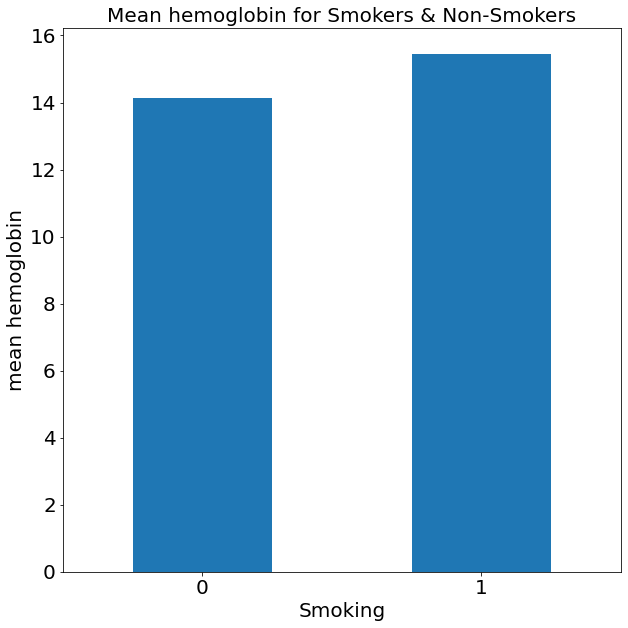

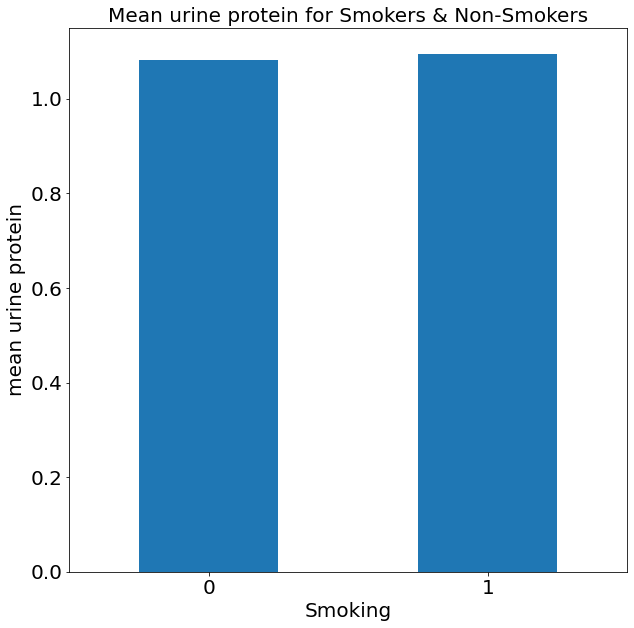

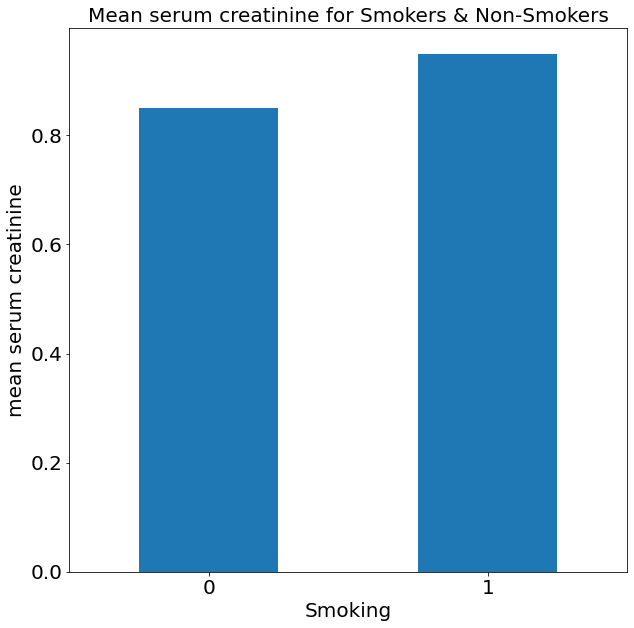

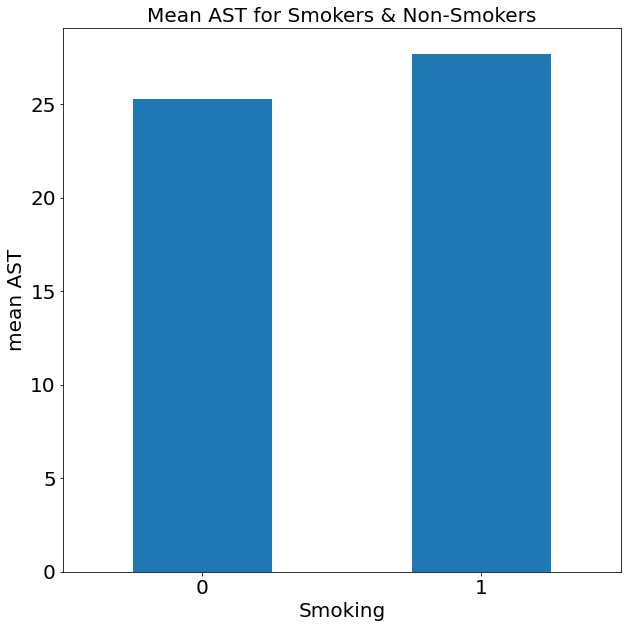

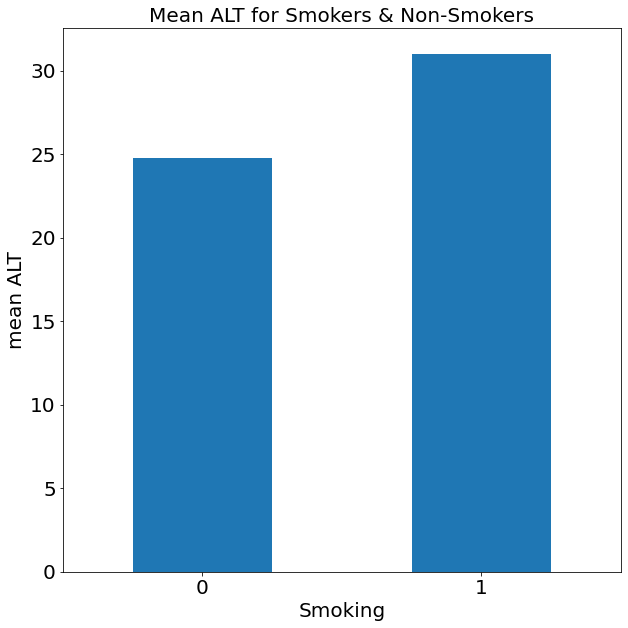

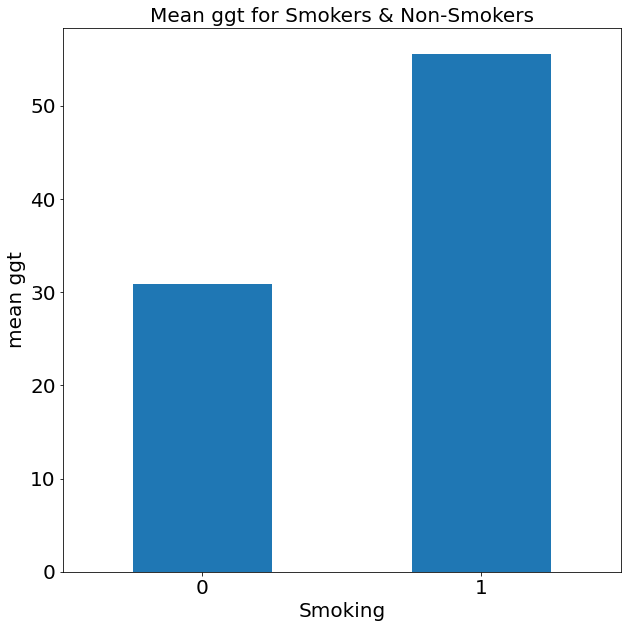

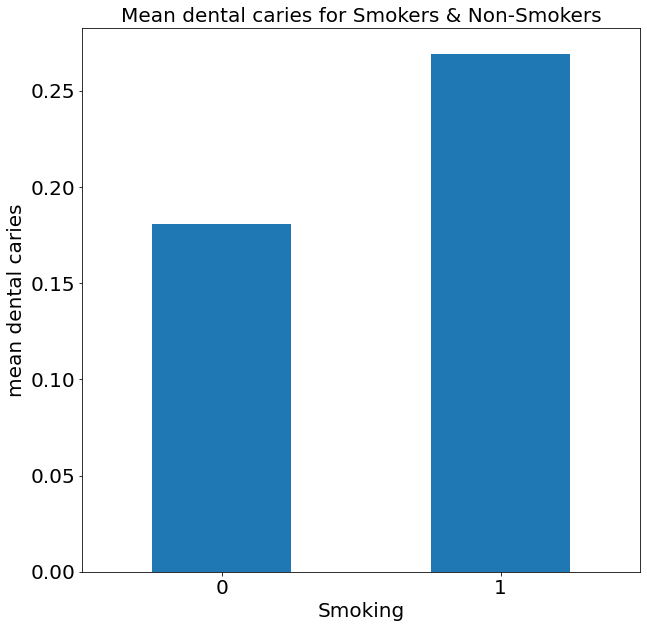

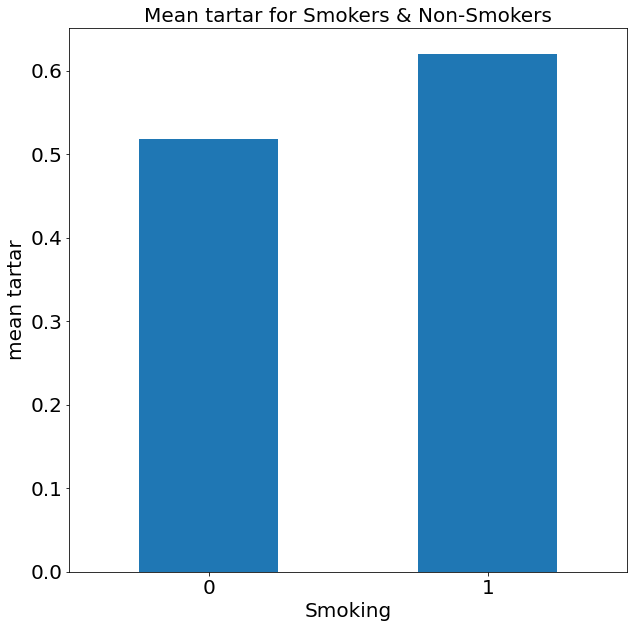

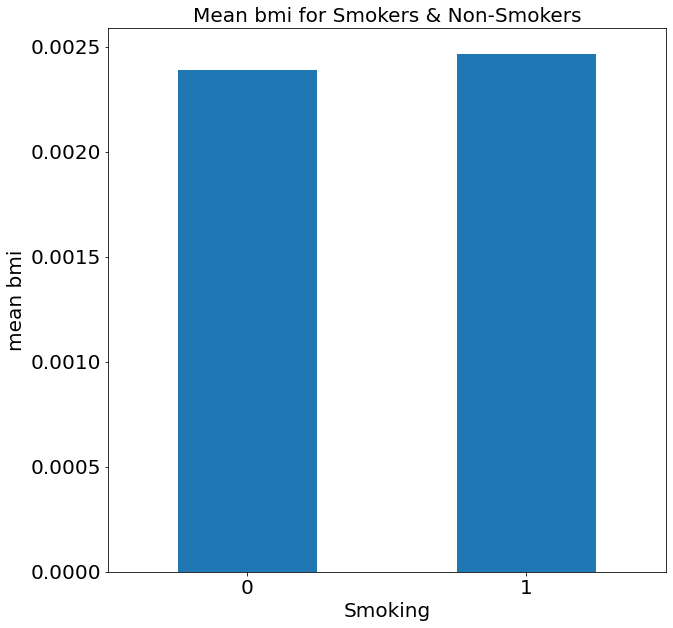

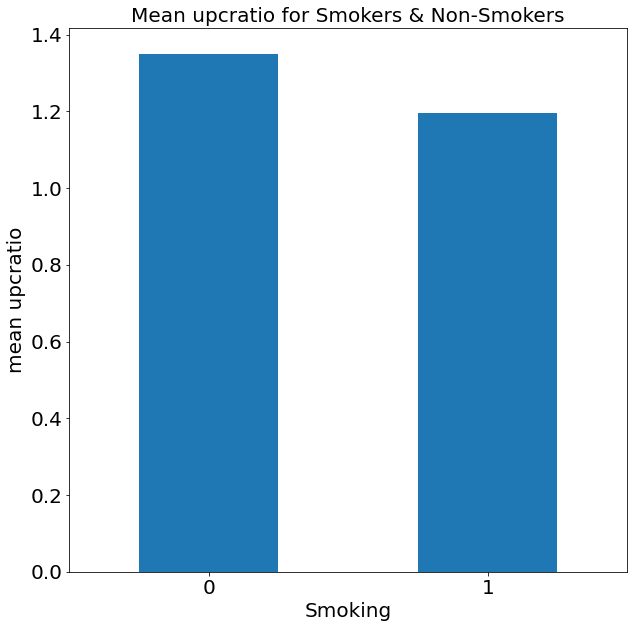

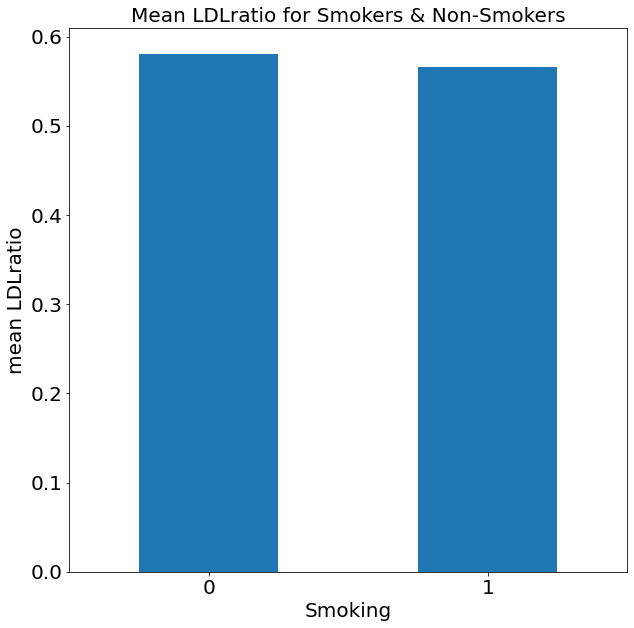

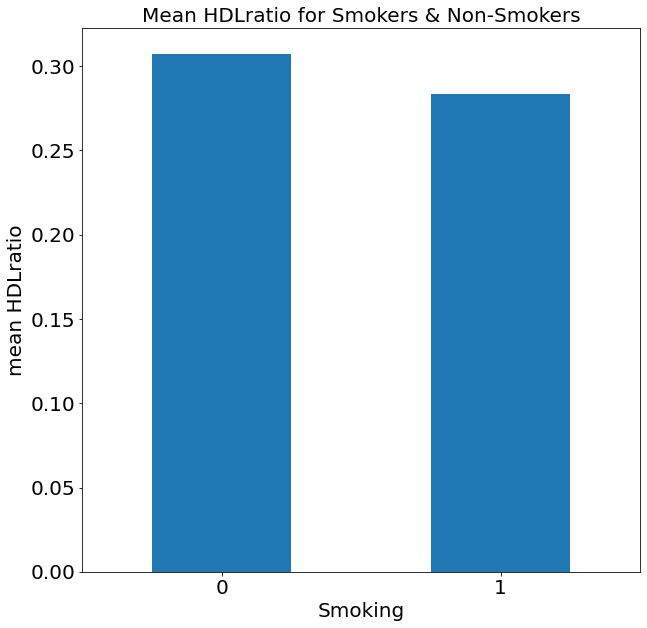

In [ ]:
for col in smokers_df.columns[1:]:
  make_bar(smokers_df, col)

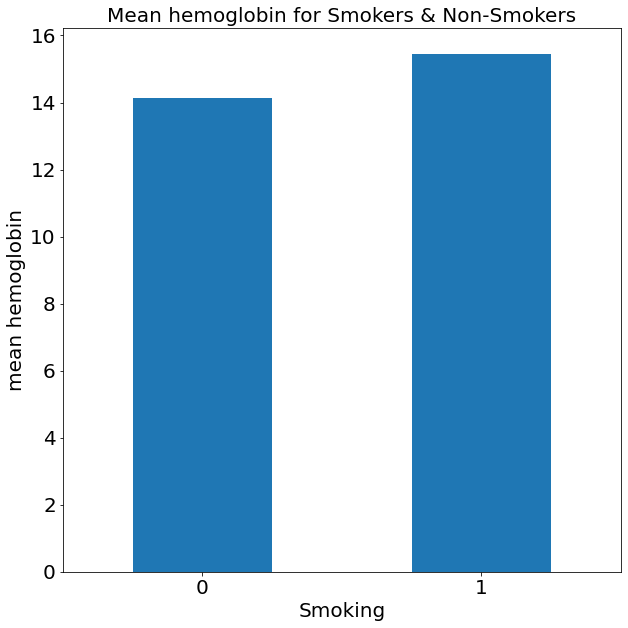

In [ ]:
make_bar(smokers_df,'hemoglobin')

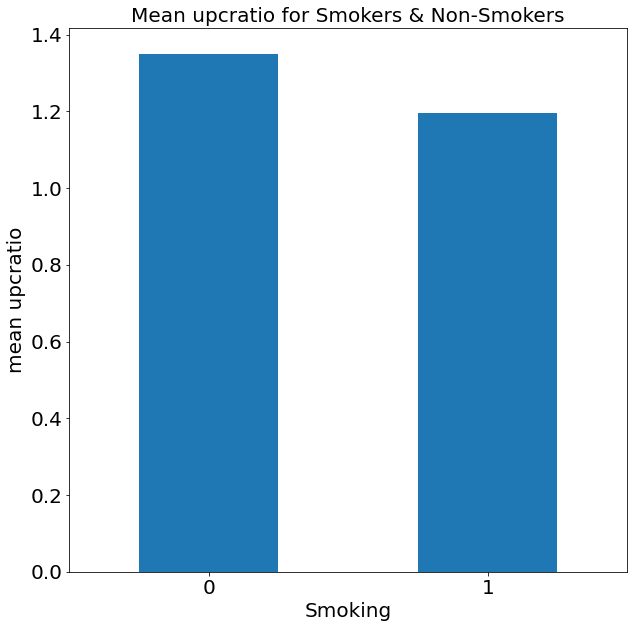

In [ ]:
make_bar(smokers_df,'upcratio')

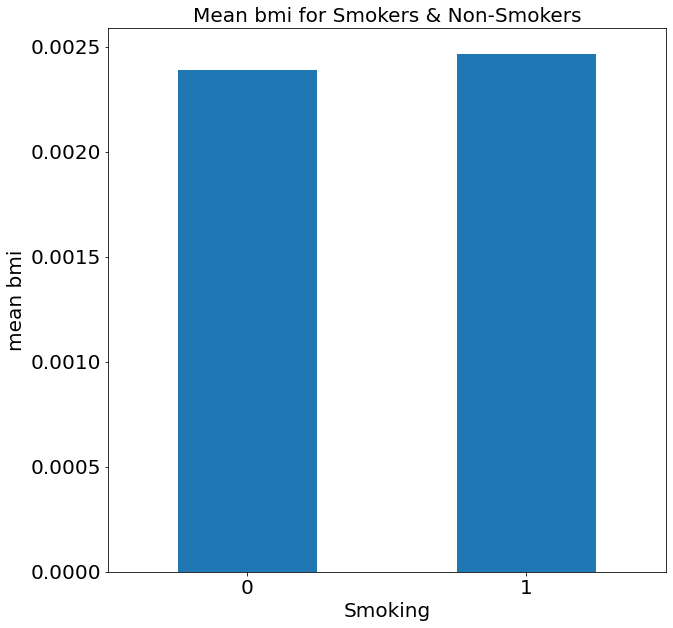

In [ ]:
make_bar(smokers_df,'bmi')

##Scatterplots
Just for fun

Text(0, 0.5, 'Relaxed BP')

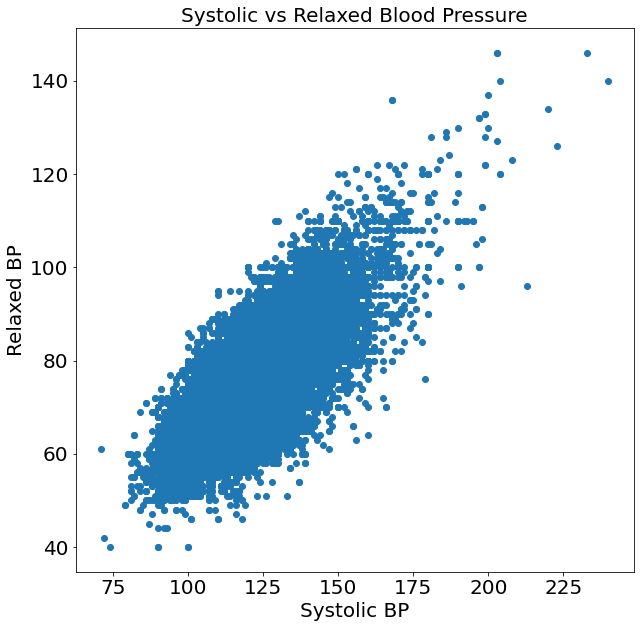

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['systolic'],df['relaxation'])
plt.title('Systolic vs Relaxed Blood Pressure')
plt.xlabel('Systolic BP')
plt.ylabel('Relaxed BP')

In [ ]:
print(df['LDL'].max())
print(df['HDL'].max())

1860
618


Text(0, 0.5, 'HDL')

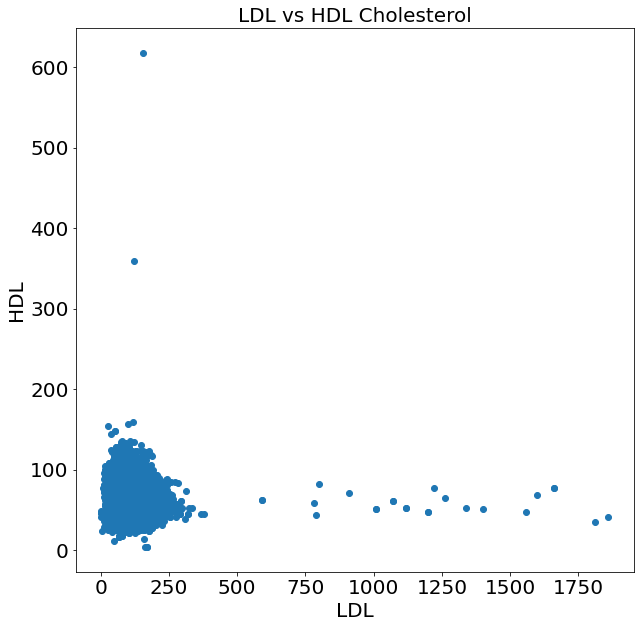

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['LDL'],df['HDL'])
plt.title('LDL vs HDL Cholesterol')
plt.xlabel('LDL')
plt.ylabel('HDL')

Text(0, 0.5, 'eyesight(left)')

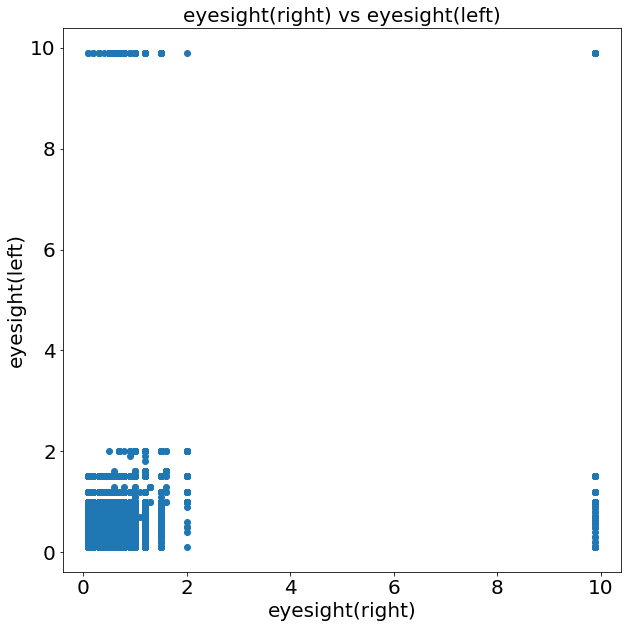

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['eyesight(right)'],df['eyesight(left)'])
plt.title('eyesight(right) vs eyesight(left)')
plt.xlabel('eyesight(right)')
plt.ylabel('eyesight(left)')